In [157]:
# from google.colab import drive
# drive.mount('/content/drive')

In [158]:
%cd /content/drive/My Drive/MLEndToEnd

/content/drive/My Drive/MLEndToEnd


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'ticks')
import re
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 1550)

#Model Libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

#metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score, auc

import warnings
warnings.filterwarnings('ignore')

In [160]:
# Adding some constants
from collections import namedtuple

In [161]:
Constants = namedtuple('Constants', ['UNDERSCORE_6', 
                                     'UNDERSCORE_7', 
                                     'UNDERSCORE_8', 
                                     'FILENAME_HIGHVALUECUSTOMER', 
                                     'RANDOM_STATE',
                                     'INCREMENT_PCA',
                                     'ACTUAL_FEATURES',
                                     'OVER_SAMPLING',
                                     'CV_FOLDS'])
Constants = Constants('_6','_7','_8', 'HighValueCustomer',100,'Incremental PCA', 'Actual Features', 'Over Sampling', 5)

# Telecom Churn Prediction

## Business problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

So we need to analyse telecom industry data and predict high value customers who are at high risk of churn and identify main indicators of churn

In [162]:
telecom_df = pd.read_csv('telecom_churn_data.csv')
telecom_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10          nan   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   
2            9/30/2014  167.69  189.06  210.23  290.71        11.54   
3            9/30/2014  221.34  251.10  508.05  389.50        99.91   
4            9/30/2014  261.64  309.88  238.17  163.43        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan         0.00          nan           nan           nan   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           nan            nan            nan           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan           0.00            nan   
1           0.00           0.00           0.00           0.00           0.00   
2          38.49           0.00           0.00           0.00          70.94   
3           0.00           0.00          28.09          39.04           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan              0.00               nan   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan              0.00               nan   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan              0.00               nan   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06  

In [163]:
telecom_df.shape

(99999, 226)

In [164]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [165]:
telecom_df.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

## Defining focus area to predict Churn Customer

In our case, we use **Usage-Based churn**, Customer who have not done any usage, either incoming or outgoing- in terms of calls, internet etc. over a period of time.<br>
In our case, we focus on **High value customer**, 80% of revenue comes from the top 20% customer(call high value customer). Aim is to reduce the significant revenue leakage.<br><br>

**Three phases of Customer Lifecycle**

**Good phase:** In this phase, the customer is happy with the service and behaves as usual.

**Action phase:** The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

**Churn phase:** In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

**Defining High Value Customer,** Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [166]:
pd.DataFrame(telecom_df.columns, columns=['ColumName'])

ColumName
0               mobile_number
1                   circle_id
2              loc_og_t2o_mou
3              std_og_t2o_mou
4              loc_ic_t2o_mou
5        last_date_of_month_6
6        last_date_of_month_7
7        last_date_of_month_8
8        last_date_of_month_9
9                      arpu_6
10                     arpu_7
11                     arpu_8
12                     arpu_9
13                onnet_mou_6
14                onnet_mou_7
15                onnet_mou_8
16                onnet_mou_9
17               offnet_mou_6
18               offnet_mou_7
19               offnet_mou_8
20               offnet_mou_9
21              roam_ic_mou_6
22              roam_ic_mou_7
23              roam_ic_mou_8
24              roam_ic_mou_9
25              roam_og_mou_6
26              roam_og_mou_7
27              roam_og_mou_8
28              roam_og_mou_9
29           loc_og_t2t_mou_6
30           loc_og_t2t_mou_7
31           loc_og_t2t_mou_8
32           loc_og_t2t_mou_9
33           loc_og_t2m_mou_6
34           loc_og_t2m_mou_7
35           loc_og_t2m_mou_8
36           loc_og_t2m_mou_9
37           loc_og_t2f_mou_6
38           loc_og_t2f_mou_7
39           loc_og_t2f_mou_8
40           loc_og_t2f_mou_9
41           loc_og_t2c_mou_6
42           loc_og_t2c_mou_7
43           loc_og_t2c_mou_8
44           loc_og_t2c_mou_9
45               loc_og_mou_6
46               loc_og_mou_7
47               loc_og_mou_8
48               loc_og_mou_9
49           std_og_t2t_mou_6
50           std_og_t2t_mou_7
51           std_og_t2t_mou_8
52           std_og_t2t_mou_9
53           std_og_t2m_mou_6
54           std_og_t2m_mou_7
55           std_og_t2m_mou_8
56           std_og_t2m_mou_9
57           std_og_t2f_mou_6
58           std_og_t2f_mou_7
59           std_og_t2f_mou_8
60           std_og_t2f_mou_9
61           std_og_t2c_mou_6
62           std_og_t2c_mou_7
63           std_og_t2c_mou_8
64           std_og_t2c_mou_9
65               std_og_mou_6
66               std_og_mou_7
67               std_og_mou_8
68               std_og_mou_9
69               isd_og_mou_6
70               isd_og_mou_7
71               isd_og_mou_8
72               isd_og_mou_9
73               spl_og_mou_6
74               spl_og_mou_7
75               spl_og_mou_8
76               spl_og_mou_9
77                og_others_6
78                og_others_7
79                og_others_8
80                og_others_9
81             total_og_mou_6
82             total_og_mou_7
83             total_og_mou_8
84             total_og_mou_9
85           loc_ic_t2t_mou_6
86           loc_ic_t2t_mou_7
87           loc_ic_t2t_mou_8
88           loc_ic_t2t_mou_9
89           loc_ic_t2m_mou_6
90           loc_ic_t2m_mou_7
91           loc_ic_t2m_mou_8
92           loc_ic_t2m_mou_9
93           loc_ic_t2f_mou_6
94           loc_ic_t2f_mou_7
95           loc_ic_t2f_mou_8
96           loc_ic_t2f_mou_9
97               loc_ic_mou_6
98               loc_ic_mou_7
99               loc_ic_mou_8
100              loc_ic_mou_9
101          std_ic_t2t_mou_6
102          std_ic_t2t_mou_7
103          std_ic_t2t_mou_8
104          std_ic_t2t_mou_9
105          std_ic_t2m_mou_6
106          std_ic_t2m_mou_7
107          std_ic_t2m_mou_8
108          std_ic_t2m_mou_9
109          std_ic_t2f_mou_6
110          std_ic_t2f_mou_7
111          std_ic_t2f_mou_8
112          std_ic_t2f_mou_9
113          std_ic_t2o_mou_6
114          std_ic_t2o_mou_7
115          std_ic_t2o_mou_8
116          std_ic_t2o_mou_9
117              std_ic_mou_6
118              std_ic_mou_7
119              std_ic_mou_8
120              std_ic_mou_9
121            total_ic_mou_6
122            total_ic_mou_7
123            total_ic_mou_8
124            total_ic_mou_9
125              spl_ic_mou_6
126              spl_ic_mou_7
127              spl_ic_mou_8
128              spl_ic_mou_9
129              isd_ic_mou_6
130              isd_ic_mou_7
131              isd_ic_mou_8
132              isd_ic_mou_9


#### Lets identify high value customer
- First we need to get, total data recharge and amount for data recharge for month of good phase.
- total data recharge * avg. amount data recharge (total_amt_data_rech) total amount for data recharge.
- Add total rech amount with total_amt_data_rech to get total_amt for each month.
- Take average of total_amt for all the months (2 in this case).

Creating List which collect those columns which will be deleted from the data

In [167]:
#Delete column list
dropColList = []

In [168]:
telecom_df['total_data_rech_amt_6'] = telecom_df['total_rech_data_6'] * telecom_df['av_rech_amt_data_6']
telecom_df['total_data_rech_amt_7'] = telecom_df['total_rech_data_7'] * telecom_df['av_rech_amt_data_7']
telecom_df['total_data_rech_amt_8'] = telecom_df['total_rech_data_8'] * telecom_df['av_rech_amt_data_8']

In [169]:
telecom_df['total_data_call_rech_amt_6'] = telecom_df[['total_data_rech_amt_6', 'total_rech_amt_6']].sum(axis = 1)
telecom_df['total_data_call_rech_amt_7'] = telecom_df[['total_data_rech_amt_7', 'total_rech_amt_7']].sum(axis =1)
telecom_df['total_data_call_rech_amt_8'] = telecom_df[['total_data_rech_amt_8', 'total_rech_amt_8']].sum(axis =1)

In [170]:
dropColList.append('total_rech_data_6')
dropColList.append('av_rech_amt_data_6')
dropColList.append('total_rech_data_7')
dropColList.append('av_rech_amt_data_7')
dropColList.append('total_rech_data_8')
dropColList.append('av_rech_amt_data_8')
dropColList.append('total_rech_amt_6')
dropColList.append('total_rech_amt_7')
dropColList.append('total_rech_amt_8')
dropColList.append('total_data_rech_amt_6')
dropColList.append('total_data_rech_amt_7')
dropColList.append('total_data_rech_amt_8')

In [171]:
telecom_df['avg_rech_amt_6_7'] = telecom_df[['total_data_call_rech_amt_6', 'total_data_call_rech_amt_7']].mean(axis = 1)

In [172]:
telecom_df[['total_data_call_rech_amt_6', 'total_data_call_rech_amt_7', 'avg_rech_amt_6_7']].quantile(np.linspace(0.1, 1, 10))

total_data_call_rech_amt_6  total_data_call_rech_amt_7  avg_rech_amt_6_7
0.10                        0.00                        0.00             60.00
0.20                       89.00                       75.00            108.50
0.30                      130.00                      120.00            155.00
0.40                      200.00                      190.00            209.50
0.50                      266.00                      258.00            275.00
0.60                      354.00                      350.00            360.00
0.70                      476.00                      476.00            478.00
0.80                      650.00                      663.00            656.50
0.90                     1025.00                     1065.00           1028.00
1.00                   113458.00                    56075.00          61236.00

If we use greater than or equal to, we end up getting a little above 30K records as against to 29.9K records. <br>
So, if we conisder only  greater than, then we get 29.9K records. <br>
Therefore we have considered greater than to filter high value customers

In [173]:
df_HighValueCustomer = telecom_df[telecom_df['avg_rech_amt_6_7'] > telecom_df['avg_rech_amt_6_7'].quantile(0.70)]

In [174]:
df_HighValueCustomer.shape

(29953, 233)

In [175]:
df_HighValueCustomer.to_csv('Telecom_HighValueCustomer.csv')

### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

*total_ic_mou_9*</br>
*total_og_mou_9*</br>
*vol_2g_mb_9*</br>
vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [176]:
# columns are float64 type so condition for Churn will add 0.00 
churndCols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
df_HighValueCustomer[churndCols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  29953 non-null  float64
 1   total_og_mou_9  29953 non-null  float64
 2   vol_2g_mb_9     29953 non-null  float64
 3   vol_3g_mb_9     29953 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [177]:
df_HighValueCustomer['Churn'] = np.where(
                       ((df_HighValueCustomer['total_ic_mou_9'] == 0.00) | (df_HighValueCustomer['total_og_mou_9'] == 0.00))
                        & ((df_HighValueCustomer['vol_2g_mb_9'] == 0.00) | (df_HighValueCustomer['vol_3g_mb_9'] == 0.00))
                        ,1,0
                      )

In [178]:
df_HighValueCustomer['Churn'].value_counts()

0    26698
1     3255
Name: Churn, dtype: int64

In [179]:
df_HighValueCustomer.drop(df_HighValueCustomer.filter(regex='_9|sep', axis=1).columns, axis =1, inplace=True)
df_HighValueCustomer.shape

(29953, 179)

In [180]:
round(100 * (df_HighValueCustomer[df_HighValueCustomer['Churn'] == 1]['Churn'].sum()/len(df_HighValueCustomer.index)), 2)

10.87

#### As we can see that there is only 11% of churn data, so its highly class imbalance problem. 
</br> Will take this in account when we will do modeling.

In [181]:
df_HighValueCustomer.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 179 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mobile_number               29953 non-null  int64  
 1   circle_id                   29953 non-null  int64  
 2   loc_og_t2o_mou              29730 non-null  float64
 3   std_og_t2o_mou              29730 non-null  float64
 4   loc_ic_t2o_mou              29730 non-null  float64
 5   last_date_of_month_6        29953 non-null  object 
 6   last_date_of_month_7        29926 non-null  object 
 7   last_date_of_month_8        29788 non-null  object 
 8   arpu_6                      29953 non-null  float64
 9   arpu_7                      29953 non-null  float64
 10  arpu_8                      29953 non-null  float64
 11  onnet_mou_6                 29411 non-null  float64
 12  onnet_mou_7                 29417 non-null  float64
 13  onnet_mou_8                 28

In [182]:
data = df_HighValueCustomer.nunique().reset_index().rename({'index':'feature', 0:'uniqueCount'}, axis =1)
oneUnique = list(data[(data['uniqueCount'] == 1)]['feature'].values)
oneUnique

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

Removing these columns because they are not adding values to predict target variables.

In [183]:
df_HighValueCustomer.drop(columns=oneUnique, axis=1, inplace=True)
df_HighValueCustomer.shape

(29953, 166)

### Handle Missing values

In [184]:
def getMissingValuesPercentage():
    pd.options.display.float_format = "{:.2f}".format
    df_MissingValues = pd.DataFrame(100 * (df_HighValueCustomer.isnull().sum()/len(df_HighValueCustomer.index))).reset_index().rename(columns ={'index':'feature', 0:'Missing%'}).sort_values('Missing%', ascending = False)
    return df_MissingValues

In [185]:
df_MissingValues = getMissingValuesPercentage()
df_MissingValues

feature  Missing%
114             max_rech_data_8     46.80
135                   arpu_2g_8     46.80
153                   fb_user_8     46.80
138            night_pck_user_8     46.80
120             count_rech_3g_8     46.80
108    date_of_last_rech_data_8     46.80
132                   arpu_3g_8     46.80
123          av_rech_amt_data_8     46.80
160       total_data_rech_amt_8     46.80
111           total_rech_data_8     46.80
117             count_rech_2g_8     46.80
136            night_pck_user_6     44.11
118             count_rech_3g_6     44.11
109           total_rech_data_6     44.11
112             max_rech_data_6     44.11
106    date_of_last_rech_data_6     44.11
151                   fb_user_6     44.11
158       total_data_rech_amt_6     44.11
121          av_rech_amt_data_6     44.11
115             count_rech_2g_6     44.11
130                   arpu_3g_6     44.11
133                   arpu_2g_6     44.11
110           total_rech_data_7     43.12
137            night_pck_user_7     43.12
122          av_rech_amt_data_7     43.12
107    date_of_last_rech_data_7     43.12
159       total_data_rech_amt_7     43.12
116             count_rech_2g_7     43.12
113             max_rech_data_7     43.12
134                   arpu_2g_7     43.12
119             count_rech_3g_7     43.12
152                   fb_user_7     43.12
131                   arpu_3g_7     43.12
12                roam_ic_mou_8      3.91
75             std_ic_t2f_mou_8      3.91
51                  og_others_8      3.91
78                 std_ic_mou_8      3.91
21             loc_og_t2m_mou_8      3.91
57             loc_ic_t2t_mou_8      3.91
9                  offnet_mou_8      3.91
60             loc_ic_t2m_mou_8      3.91
72             std_ic_t2m_mou_8      3.91
6                   onnet_mou_8      3.91
63             loc_ic_t2f_mou_8      3.91
66                 loc_ic_mou_8      3.91
48                 spl_og_mou_8      3.91
69             std_ic_t2t_mou_8      3.91
30                 loc_og_mou_8      3.91
18             loc_og_t2t_mou_8      3.91
42                 std_og_mou_8      3.91
87                 isd_ic_mou_8      3.91
39             std_og_t2f_mou_8      3.91
36             std_og_t2m_mou_8      3.91
15                roam_og_mou_8      3.91
24             loc_og_t2f_mou_8      3.91
33             std_og_t2t_mou_8      3.91
45                 isd_og_mou_8      3.91
84                 spl_ic_mou_8      3.91
90                  ic_others_8      3.91
27             loc_og_t2c_mou_8      3.91
102         date_of_last_rech_8      1.94
70             std_ic_t2m_mou_6      1.81
76                 std_ic_mou_6      1.81
85                 isd_ic_mou_6      1.81
73             std_ic_t2f_mou_6      1.81
82                 spl_ic_mou_6      1.81
4                   onnet_mou_6      1.81
19             loc_og_t2m_mou_6      1.81
10                roam_ic_mou_6      1.81
67             std_ic_t2t_mou_6      1.81
64                 loc_ic_mou_6      1.81
22             loc_og_t2f_mou_6      1.81
25             loc_og_t2c_mou_6      1.81
28                 loc_og_mou_6      1.81
16             loc_og_t2t_mou_6      1.81
31             std_og_t2t_mou_6      1.81
34             std_og_t2m_mou_6      1.81
37             std_og_t2f_mou_6      1.81
40                 std_og_mou_6      1.81
43                 isd_og_mou_6      1.81
46                 spl_og_mou_6      1.81
13                roam_og_mou_6      1.81
49                  og_others_6      1.81
55             loc_ic_t2t_mou_6      1.81
58             loc_ic_t2m_mou_6      1.81
61             loc_ic_t2f_mou_6      1.81
7                  offnet_mou_6      1.81
88                  ic_others_6      1.81
89                  ic_others_7      1.79
83                 spl_ic_mou_7      1.79
86                 isd_ic_mou_7      1.79
59             loc_ic_t2m_mou_7      1.79
47                 spl_og_mou_7      1.79
44                 isd_og_mou_7      1.79
41                 std_og_mou_7   

As we can see from the above data, percentage **43.12 to 46.80** of null values is so much high in multiple columns.
<br/> Since we do not have information about the columns values so Either we can impute with mean or median but this add bias in data.

In [186]:
highNullValuesColumns = df_MissingValues[df_MissingValues['Missing%'] >= 42.0]
print(highNullValuesColumns)
print(len(highNullValuesColumns),'columns have high percentage of null values', )

                      feature  Missing%
114           max_rech_data_8     46.80
135                 arpu_2g_8     46.80
153                 fb_user_8     46.80
138          night_pck_user_8     46.80
120           count_rech_3g_8     46.80
108  date_of_last_rech_data_8     46.80
132                 arpu_3g_8     46.80
123        av_rech_amt_data_8     46.80
160     total_data_rech_amt_8     46.80
111         total_rech_data_8     46.80
117           count_rech_2g_8     46.80
136          night_pck_user_6     44.11
118           count_rech_3g_6     44.11
109         total_rech_data_6     44.11
112           max_rech_data_6     44.11
106  date_of_last_rech_data_6     44.11
151                 fb_user_6     44.11
158     total_data_rech_amt_6     44.11
121        av_rech_amt_data_6     44.11
115           count_rech_2g_6     44.11
130                 arpu_3g_6     44.11
133                 arpu_2g_6     44.11
110         total_rech_data_7     43.12
137          night_pck_user_7     43.12


In [187]:
df_HighValueCustomer[highNullValuesColumns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 166 entries, mobile_number to Churn
dtypes: float64(160), object(6)
memory usage: 39.4+ MB


In [188]:
highNullValues= list(highNullValuesColumns['feature'].values)
highNullValues

['max_rech_data_8',
 'arpu_2g_8',
 'fb_user_8',
 'night_pck_user_8',
 'count_rech_3g_8',
 'date_of_last_rech_data_8',
 'arpu_3g_8',
 'av_rech_amt_data_8',
 'total_data_rech_amt_8',
 'total_rech_data_8',
 'count_rech_2g_8',
 'night_pck_user_6',
 'count_rech_3g_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'date_of_last_rech_data_6',
 'fb_user_6',
 'total_data_rech_amt_6',
 'av_rech_amt_data_6',
 'count_rech_2g_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'total_rech_data_7',
 'night_pck_user_7',
 'av_rech_amt_data_7',
 'date_of_last_rech_data_7',
 'total_data_rech_amt_7',
 'count_rech_2g_7',
 'max_rech_data_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'fb_user_7',
 'arpu_3g_7']

Lets check dataset with 8th month columns for column **arpu_2g_8** containing null values

In [189]:
eighthMonthCols = [month8Col for month8Col in highNullValues if Constants.UNDERSCORE_8 in month8Col]
eighthMonthCols

['max_rech_data_8',
 'arpu_2g_8',
 'fb_user_8',
 'night_pck_user_8',
 'count_rech_3g_8',
 'date_of_last_rech_data_8',
 'arpu_3g_8',
 'av_rech_amt_data_8',
 'total_data_rech_amt_8',
 'total_rech_data_8',
 'count_rech_2g_8']

In [190]:
df_HighValueCustomer['arpu_2g_8'].isna().sum()

14018

In [191]:
def getValueCountOfOthercolumnsForGivenColumnNanVallue(col, relatedCols):
    monthNaData = pd.DataFrame(df_HighValueCustomer[df_HighValueCustomer[col].isna()][relatedCols].nunique()).reset_index().rename({'index':'feature', 0:'count'}, axis =1)
    return monthNaData[(monthNaData['count'] < 2) & (monthNaData['feature'] != col) ]
    

In [192]:
getValueCountOfOthercolumnsForGivenColumnNanVallue('arpu_2g_8', eighthMonthCols)

feature  count
0            max_rech_data_8      0
2                  fb_user_8      0
3           night_pck_user_8      0
4            count_rech_3g_8      0
5   date_of_last_rech_data_8      0
6                  arpu_3g_8      0
7         av_rech_amt_data_8      0
8      total_data_rech_amt_8      0
9          total_rech_data_8      0
10           count_rech_2g_8      0

As we see from above table above columns are either contains null values or only single values.
<br/>Will further analys these columns

In [193]:
# arpu_2g_8 with zero where is nan value
df_HighValueCustomer['arpu_2g_8'].fillna(0, inplace =True)

In [194]:
df_HighValueCustomer['arpu_2g_8'].isna().sum()

0

Lets check relationship with **8th month incoming calls**

In [195]:
df_HighValueCustomer['isd_ic_mou_8'].isna().sum()

1172

In [196]:
ic_mou_8 = ['std_ic_t2f_mou_8',  'loc_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 
            'loc_ic_t2m_mou_8','std_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 
            'total_ic_mou_8']

In [197]:
getValueCountOfOthercolumnsForGivenColumnNanVallue('isd_ic_mou_8', ic_mou_8)

feature  count
0  std_ic_t2f_mou_8      0
1  loc_ic_t2t_mou_8      0
2  std_ic_t2m_mou_8      0
3  loc_ic_t2m_mou_8      0
4  std_ic_t2t_mou_8      0
5  loc_ic_t2f_mou_8      0
6    total_ic_mou_8      1

From above table we can see that there are nan values for rest of the column so we fill the nan values with 0.
On computing other columns as well, on the basis of that we can fill nan with null values

In [198]:
df_HighValueCustomer['isd_ic_mou_8'].fillna(0, inplace=True)

In [199]:
df_HighValueCustomer['isd_ic_mou_8'].isna().sum()

0

Checking column **arpu_3g_8** for null values and other columns values with respect to null values of this column.

In [200]:
df_HighValueCustomer[eighthMonthCols].isna().sum()

max_rech_data_8             14018
arpu_2g_8                       0
fb_user_8                   14018
night_pck_user_8            14018
count_rech_3g_8             14018
date_of_last_rech_data_8    14018
arpu_3g_8                   14018
av_rech_amt_data_8          14018
total_data_rech_amt_8       14018
total_rech_data_8           14018
count_rech_2g_8             14018
dtype: int64

In [201]:
df_HighValueCustomer[df_HighValueCustomer['arpu_3g_8'].isna()][eighthMonthCols].nunique()

max_rech_data_8             0
arpu_2g_8                   1
fb_user_8                   0
night_pck_user_8            0
count_rech_3g_8             0
date_of_last_rech_data_8    0
arpu_3g_8                   0
av_rech_amt_data_8          0
total_data_rech_amt_8       0
total_rech_data_8           0
count_rech_2g_8             0
dtype: int64

In [202]:
df_HighValueCustomer['arpu_3g_8'].fillna(0, inplace =True)

# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Churn status distribution')

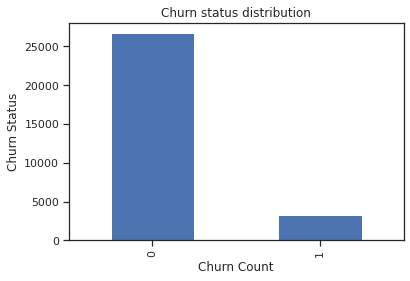

In [203]:
plt.figure(figsize =(6,4))
df_HighValueCustomer['Churn'].value_counts().plot(kind = 'bar')
plt.xlabel('Churn Count')
plt.ylabel('Churn Status')
plt.title('Churn status distribution')

Checking mobile number column and found it is unique, it means it is not adding any values in prediction so adding it with column removal list. 

In [204]:
df_HighValueCustomer['mobile_number'].value_counts().sort_values(ascending= False).head()

7000883200    1
7000066065    1
7000688705    1
7001669696    1
7001405503    1
Name: mobile_number, dtype: int64

In [205]:
dropColList.append('mobile_number')

In [206]:
df_HighValueCustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 166 entries, mobile_number to Churn
dtypes: float64(133), int64(27), object(6)
memory usage: 39.4+ MB


#### Creating some plots to understand the relationship between columns

In [207]:
#creating target columns 
targetCol = 'Churn'

In [208]:
def pairplot(dataset, colList):
    colList.append(targetCol)
    sns.pairplot(data=dataset[colList], hue=targetCol)
    

In [209]:
def churnDistPlot(dataset, col):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(12,4))
    ax = sns.distplot(dataset[dataset[targetCol] == 1][col], bins = 30, kde = False, ax= axes[0])
    ax.set_title(col + ' vs ' + 'Churn')
    ax = sns.distplot(dataset[dataset[targetCol] == 0][col], bins = 30, kde = False, ax= axes[1])
    ax.set_title(col + ' vs '+ 'Non-Churn')

In [210]:
def churnBoxAndStripPlot(dataset, col):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(12,4))
    ax = sns.boxplot(x= targetCol, y= col, data=dataset, ax=axes[0])
    ax.set_title(col + ' vs ' + targetCol)
    ax = sns.stripplot(x=targetCol, y= col, data=dataset, ax= axes[1], jitter=0.2, linewidth=1.2, edgecolor='gray')
    ax.set_title(col + ' vs ' + targetCol)       

In [211]:
def comparePlotsOfEachMonth(dataset, colList):
    if targetCol in colList:
        colList.remove(targetCol)
    for col in colList:
        churnDistPlot(dataset, col)
        churnBoxAndStripPlot(dataset, col)

#### Average Revenue PerUser

In [212]:
arpuCols = ['arpu_6', 'arpu_7', 'arpu_8']

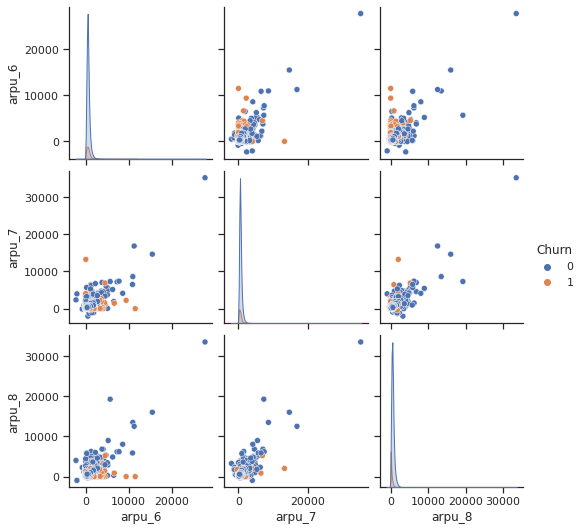

In [213]:
pairplot(df_HighValueCustomer, arpuCols)

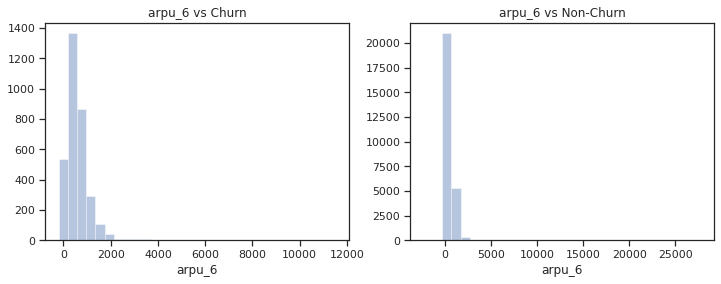

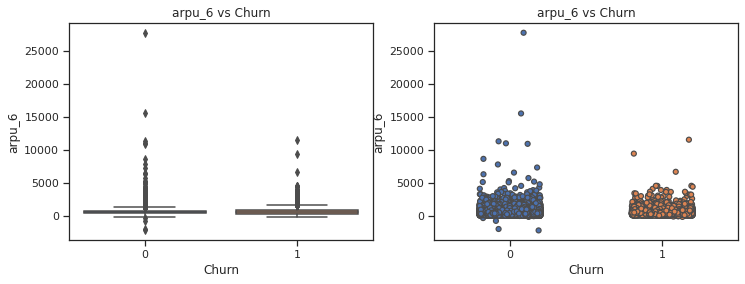

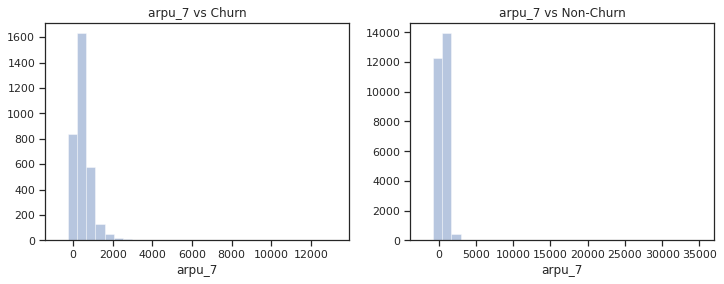

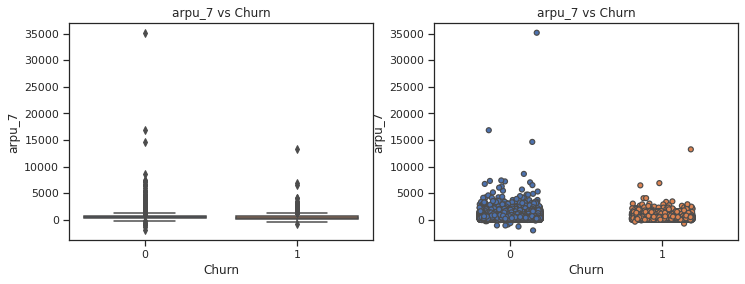

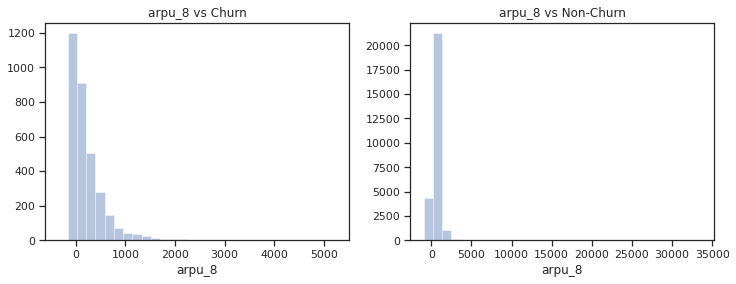

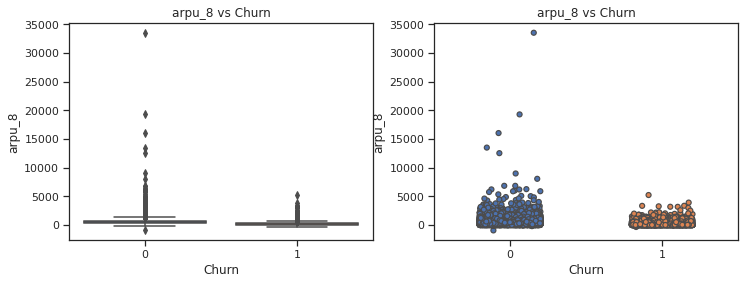

In [214]:
comparePlotsOfEachMonth(df_HighValueCustomer, arpuCols)

#### onnet_mou (On Network means within Network)

In [215]:
onNetCols = ['onnet_mou_6', 'onnet_mou_7','onnet_mou_8']

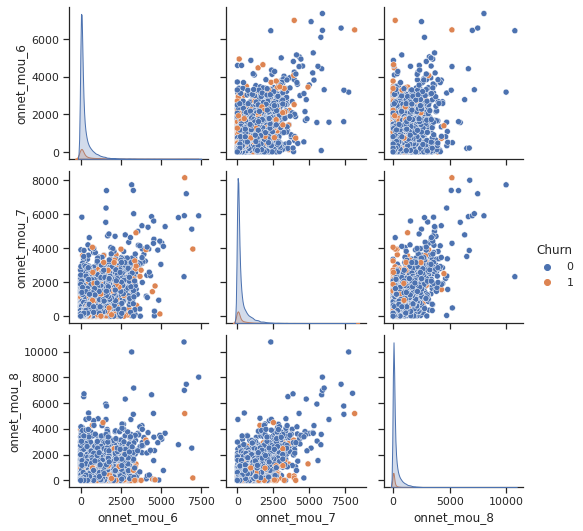

In [216]:
pairplot(df_HighValueCustomer, onNetCols)

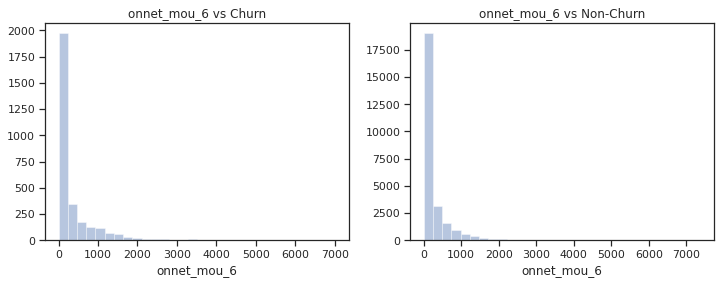

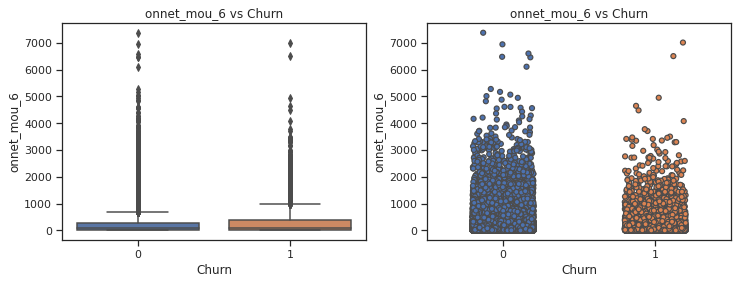

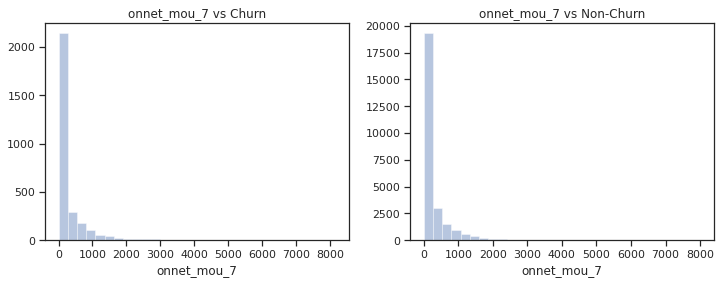

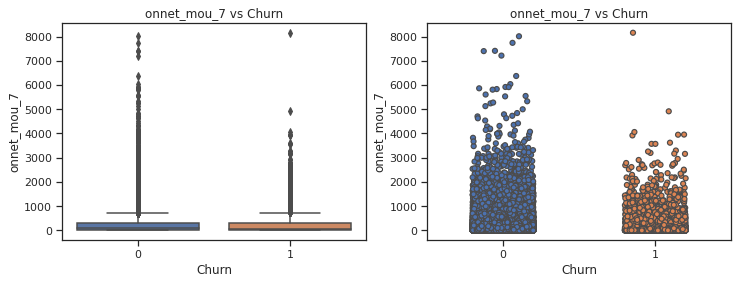

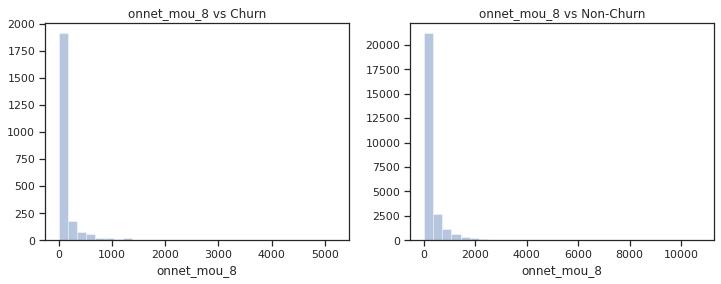

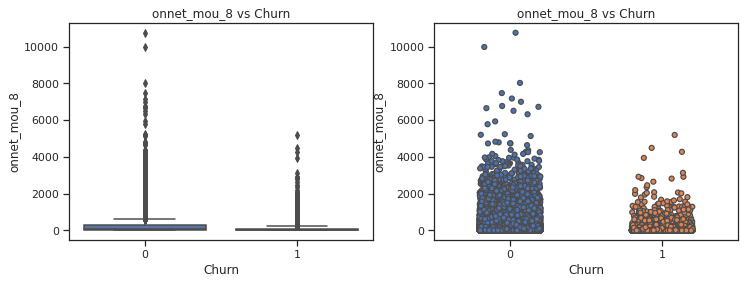

In [217]:
comparePlotsOfEachMonth(df_HighValueCustomer, onNetCols)

#### Offnet_mou (Outside of the network)

In [218]:
offnetCols = ['offnet_mou_6','offnet_mou_7','offnet_mou_8']

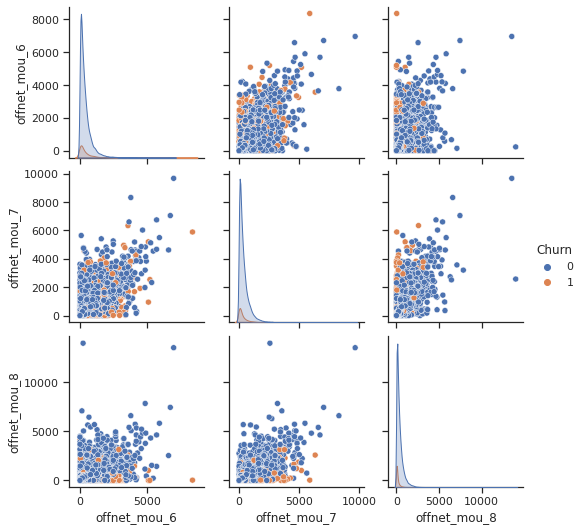

In [219]:
pairplot(df_HighValueCustomer, offnetCols)

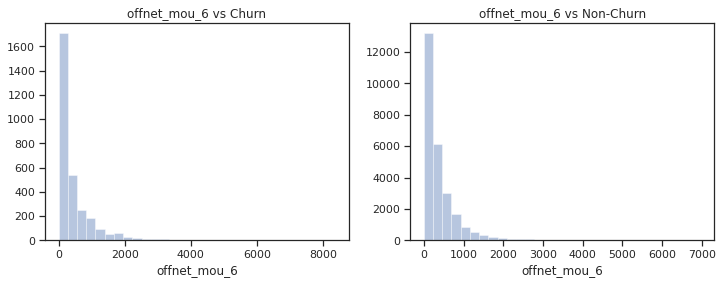

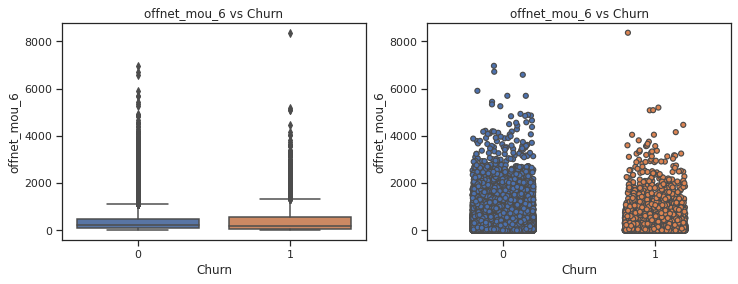

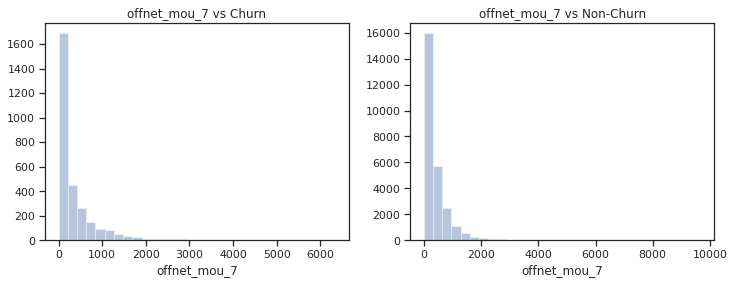

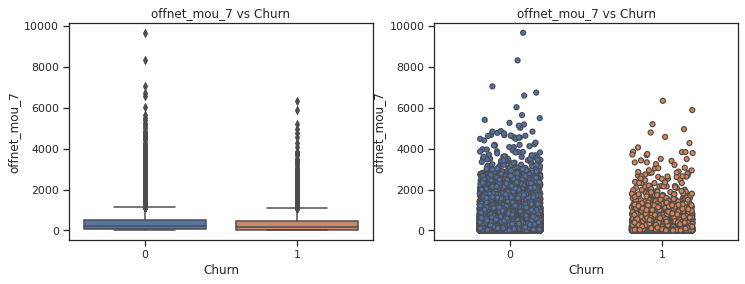

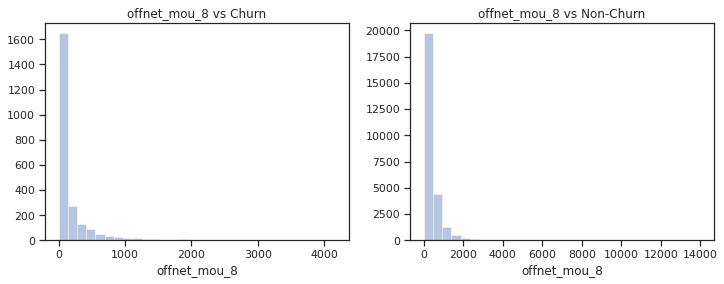

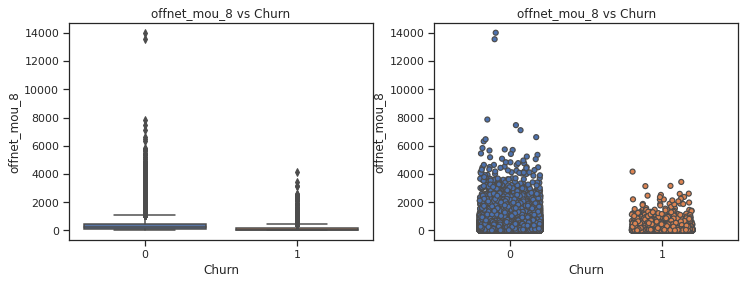

In [220]:
comparePlotsOfEachMonth(df_HighValueCustomer, offnetCols)

#### std_ic_mou (STD Incoming Minute of Usage)

In [221]:
std_ic_mou = ['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']

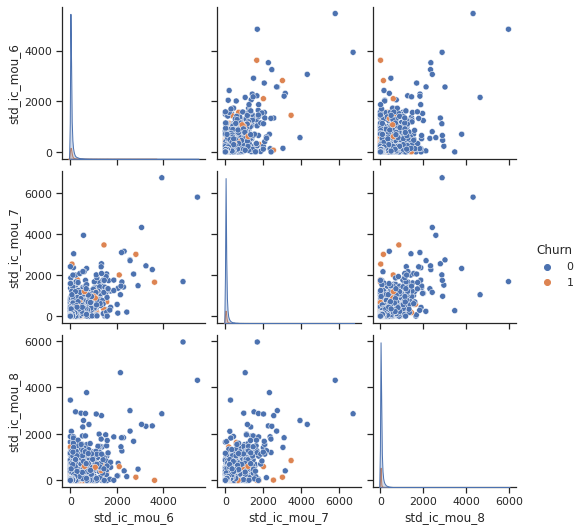

In [222]:
pairplot(df_HighValueCustomer, std_ic_mou)

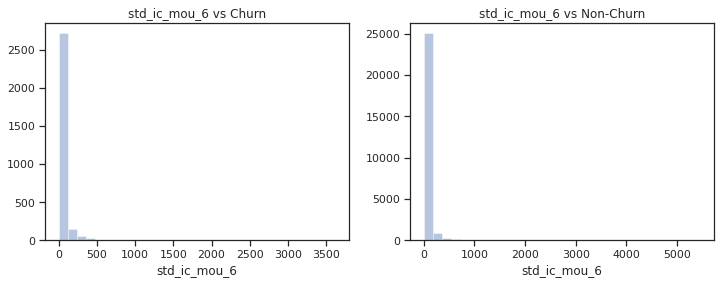

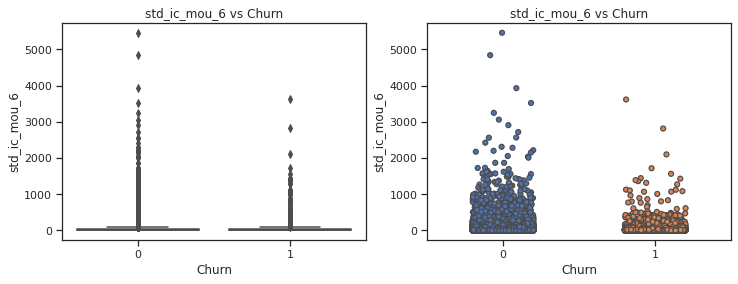

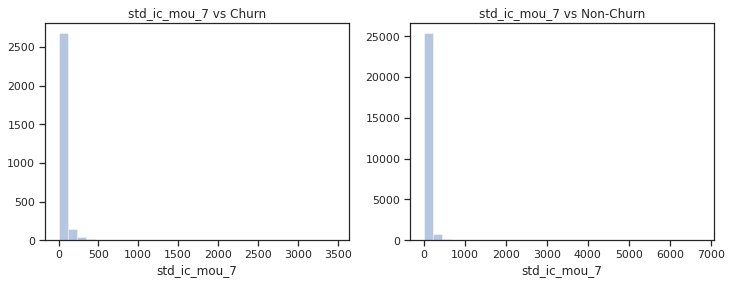

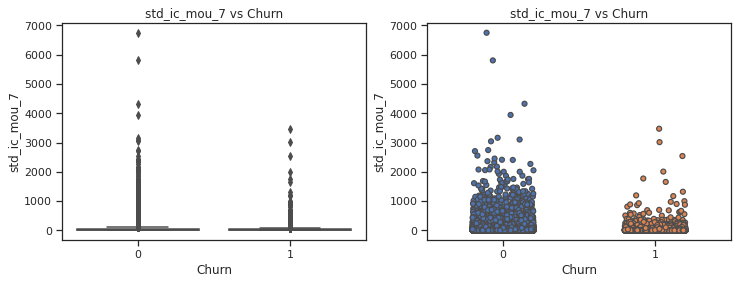

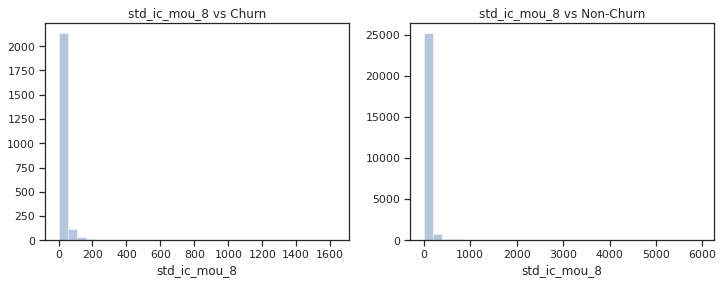

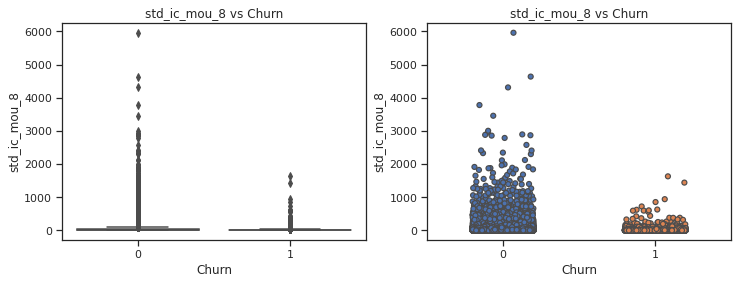

In [223]:
comparePlotsOfEachMonth(df_HighValueCustomer, std_ic_mou)

#### loc_ic_mou (Local Incoming Minute of usage)

In [224]:
loc_ic_mou = ['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']

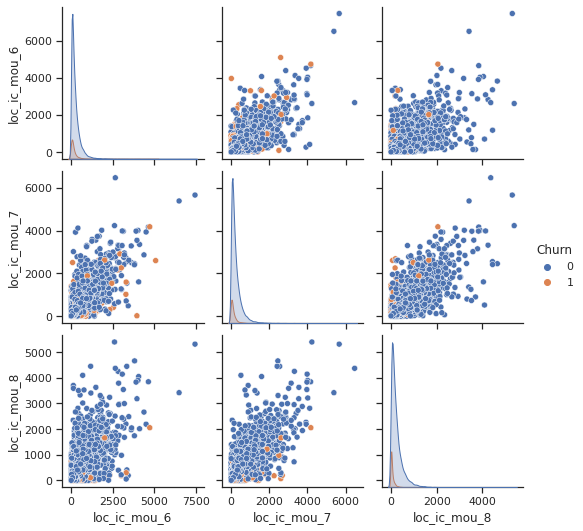

In [225]:
pairplot(df_HighValueCustomer, loc_ic_mou)

#### total_ic_mou (total in coming minutes of usage)

In [226]:
total_ic_mou = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']

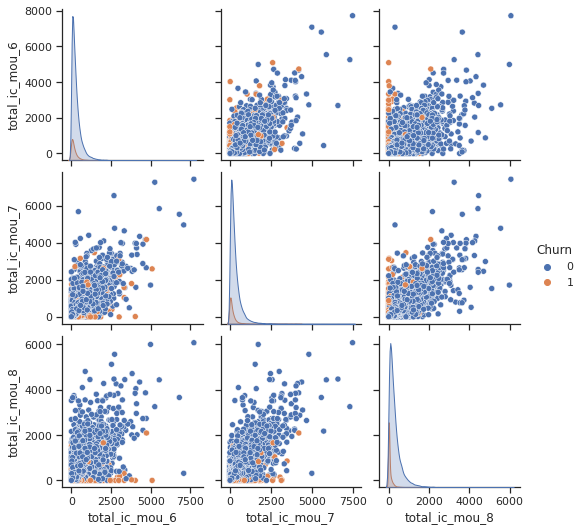

In [227]:
pairplot(df_HighValueCustomer, total_ic_mou)

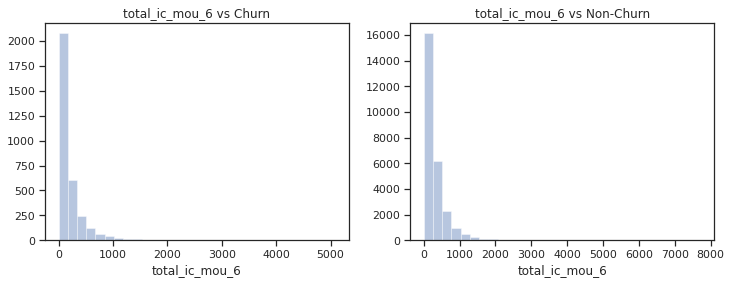

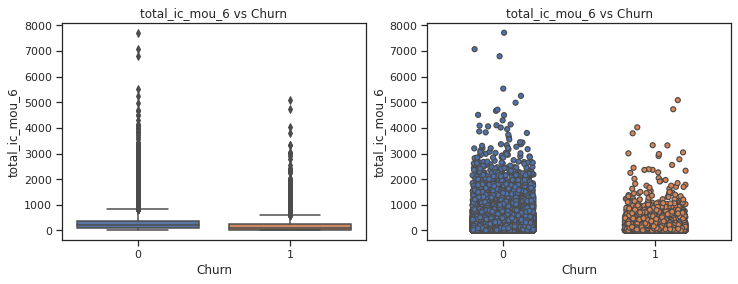

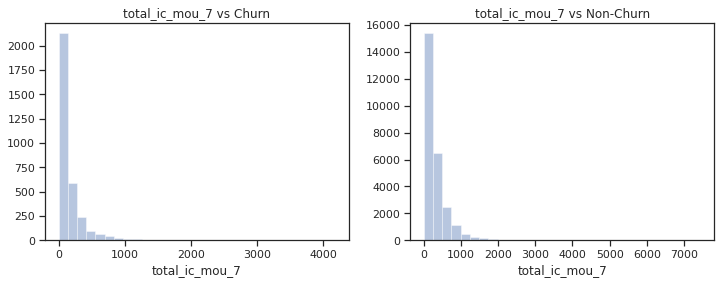

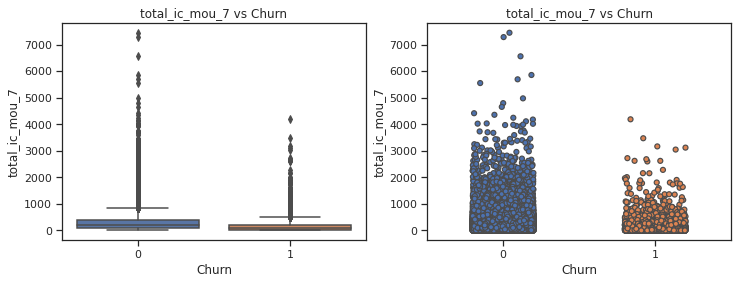

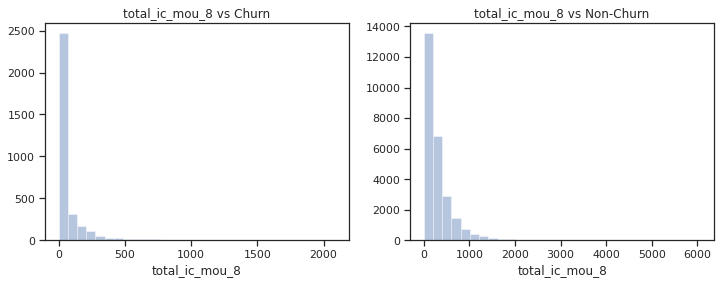

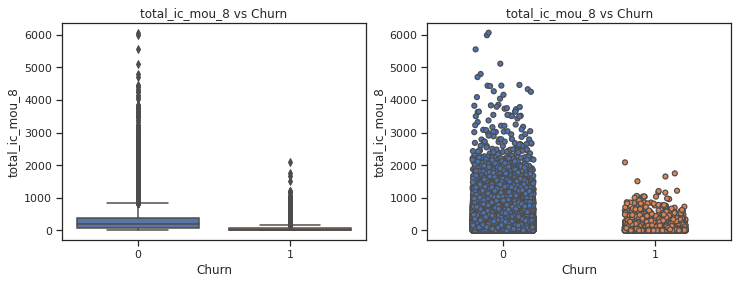

In [228]:
comparePlotsOfEachMonth(df_HighValueCustomer, total_ic_mou)

#### std_og_mou (STD outgoing minutes of usage)

In [229]:
std_og_mou = ['std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8']

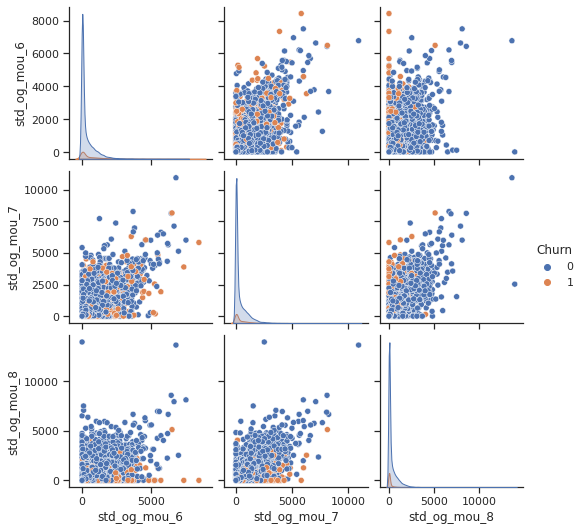

In [230]:
pairplot(df_HighValueCustomer, std_og_mou)

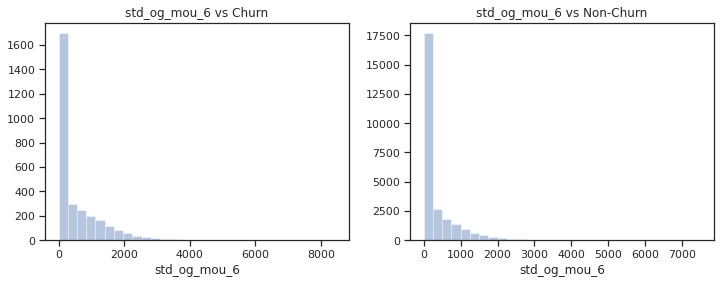

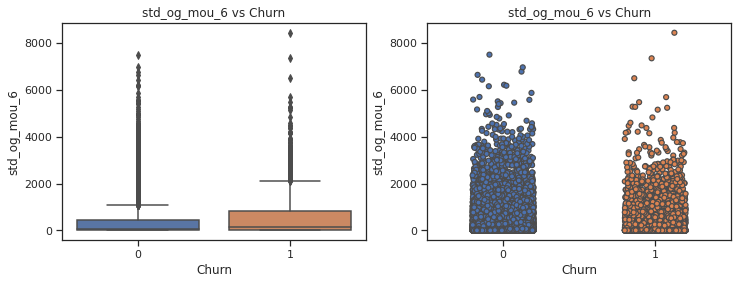

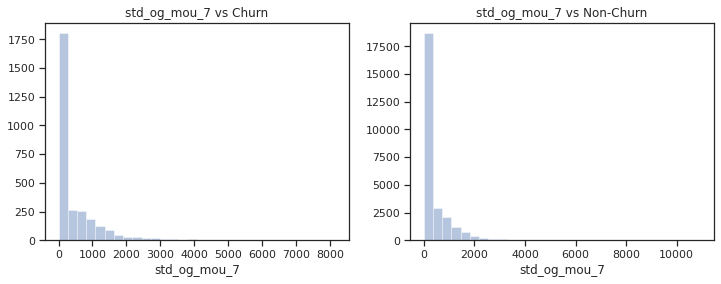

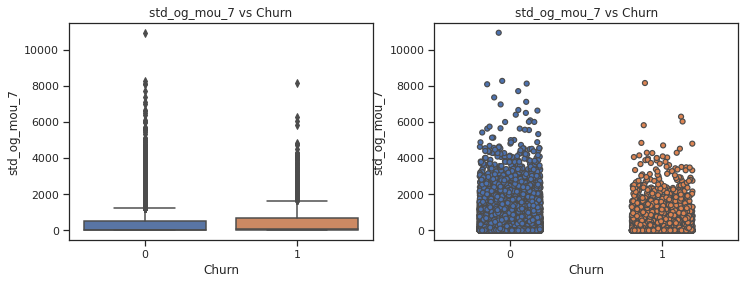

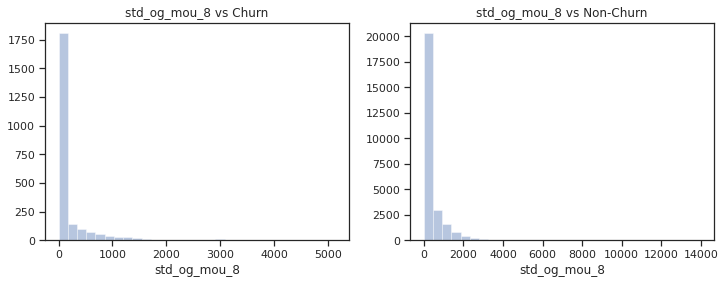

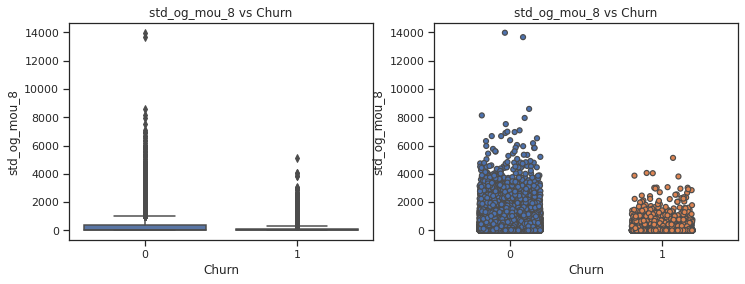

In [231]:
comparePlotsOfEachMonth(df_HighValueCustomer, std_og_mou)

#### loc_og_mou (Local Outgoing Minutes of Usage) 

In [232]:
loc_og_mou = ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8']

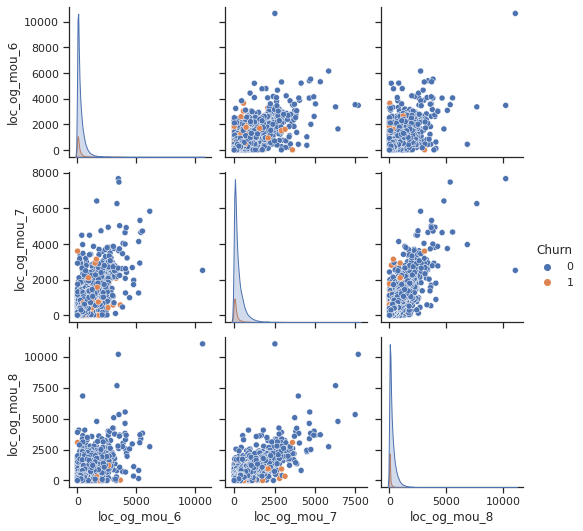

In [233]:
pairplot(df_HighValueCustomer, loc_og_mou)

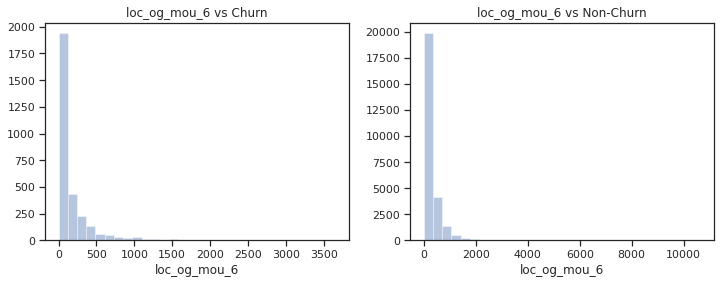

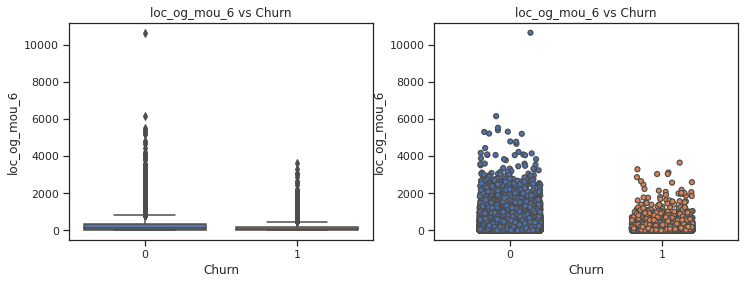

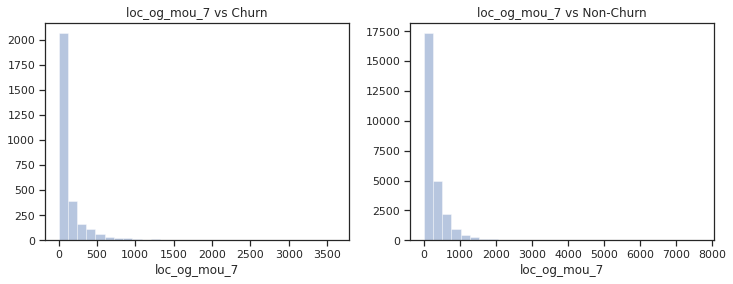

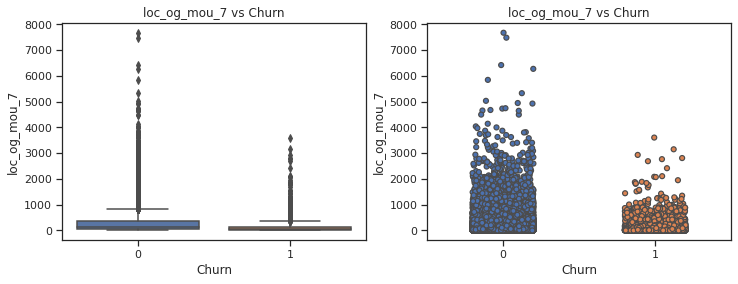

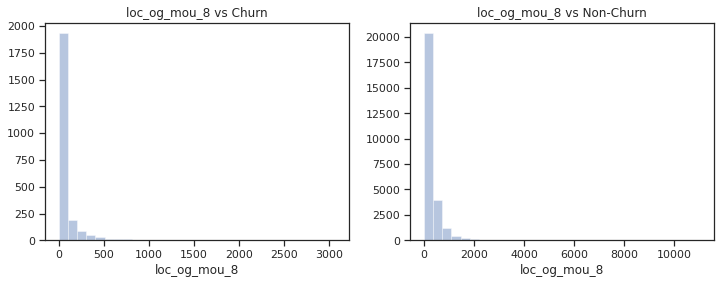

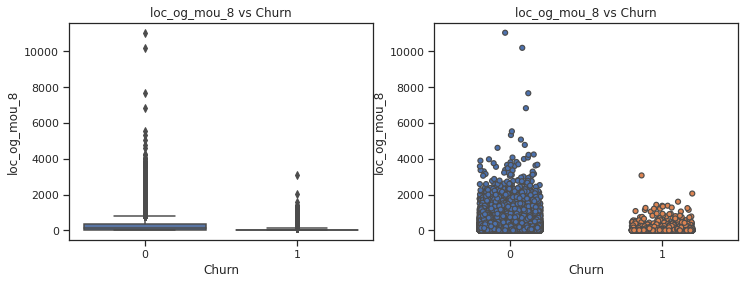

In [234]:
comparePlotsOfEachMonth(df_HighValueCustomer, loc_og_mou)

#### total_og_mou (Total Outgoing Minutes of usage)

In [235]:
total_og_mou = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']

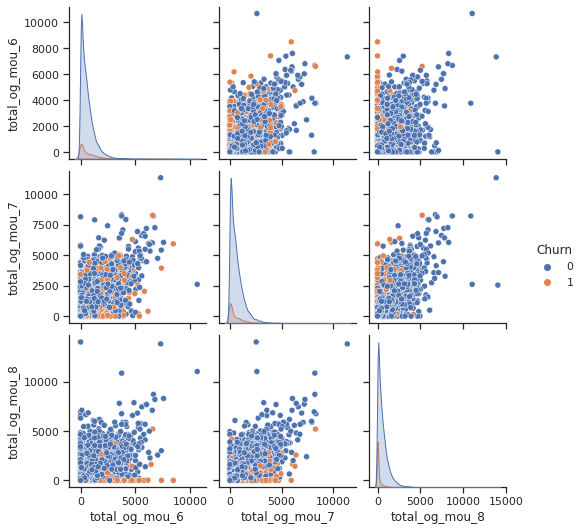

In [236]:
pairplot(df_HighValueCustomer, total_og_mou)

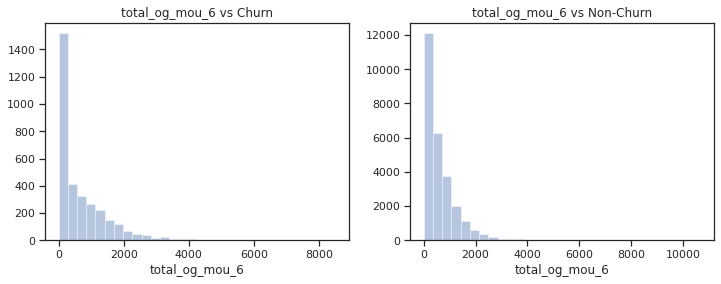

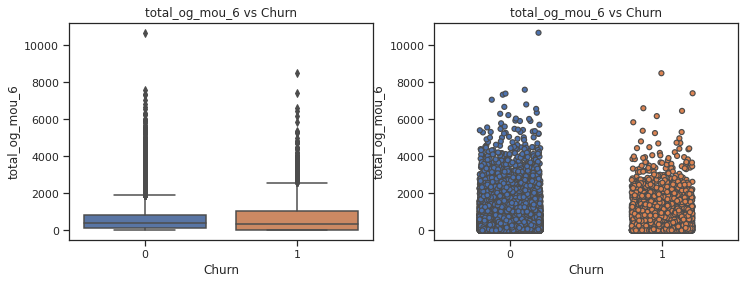

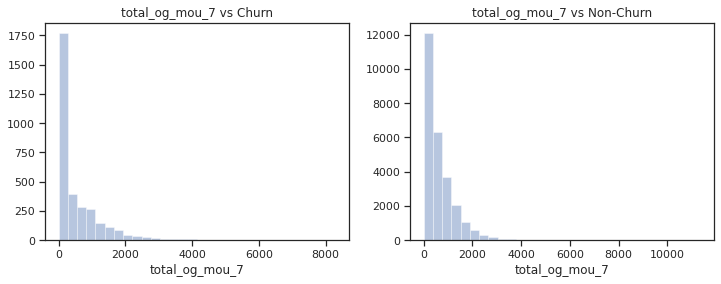

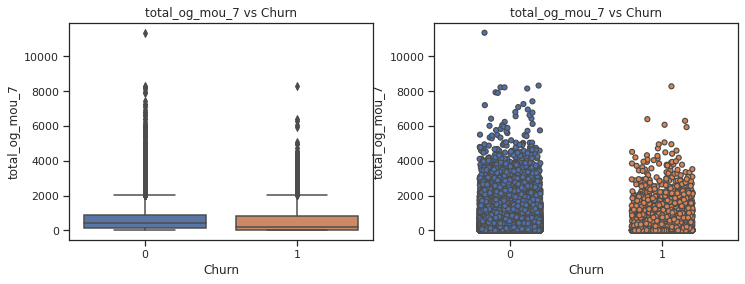

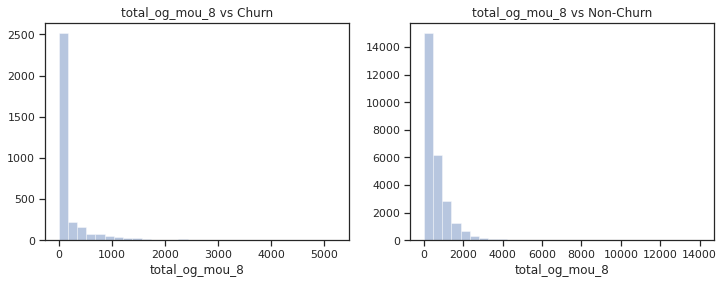

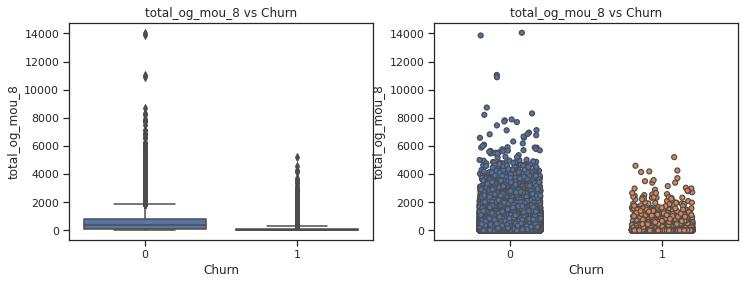

In [237]:
comparePlotsOfEachMonth(df_HighValueCustomer, total_og_mou)

#### total_rech_amt

In [238]:
total_rech_amt = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']

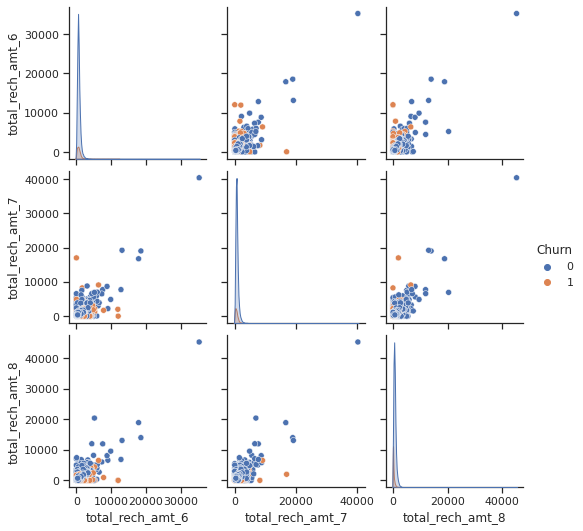

In [239]:
pairplot(df_HighValueCustomer, total_rech_amt)

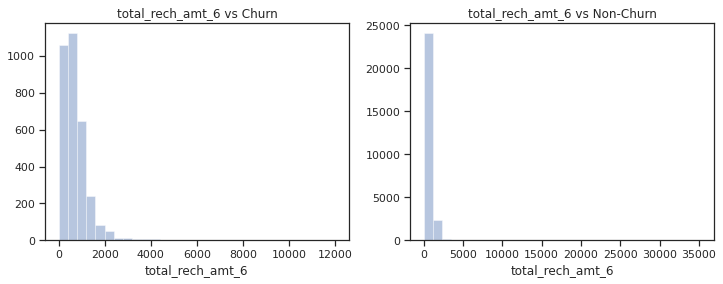

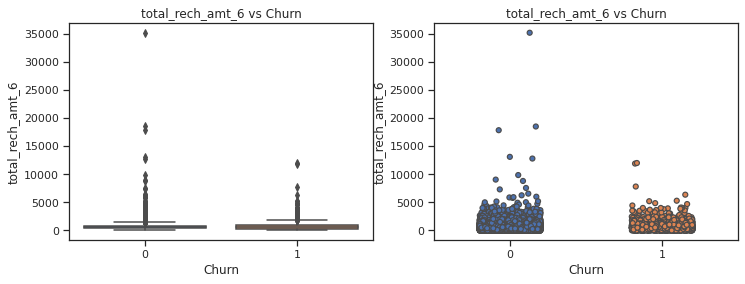

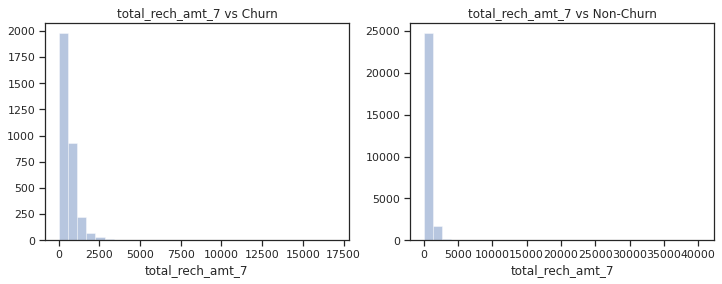

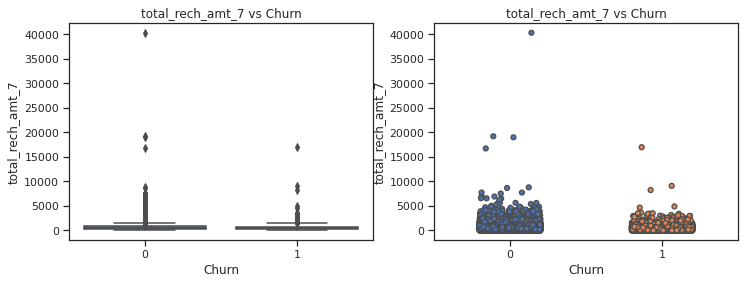

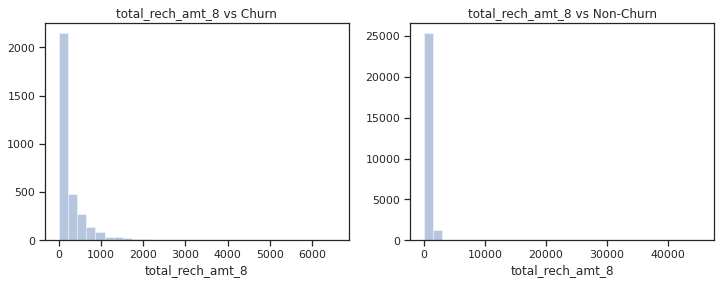

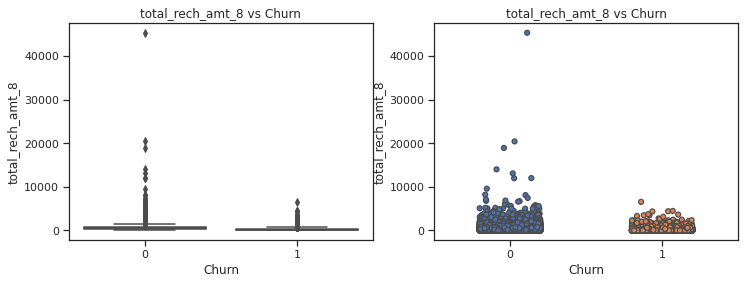

In [240]:
comparePlotsOfEachMonth(df_HighValueCustomer, total_rech_amt)

#### total_rech_data

In [241]:
total_rech_data = ['total_rech_data_6', 'total_rech_data_7','total_rech_data_8']

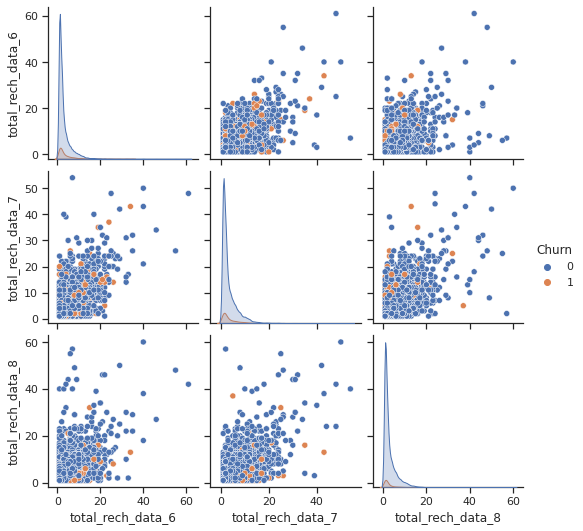

In [242]:
pairplot(df_HighValueCustomer, total_rech_data)

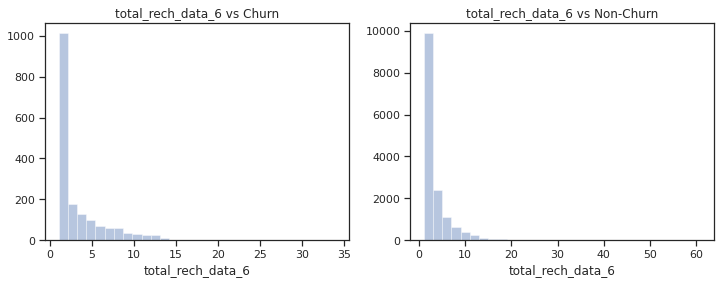

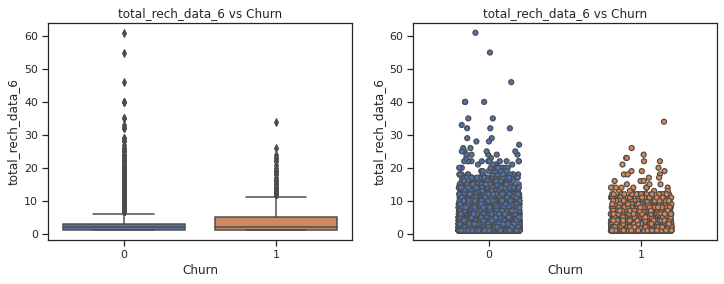

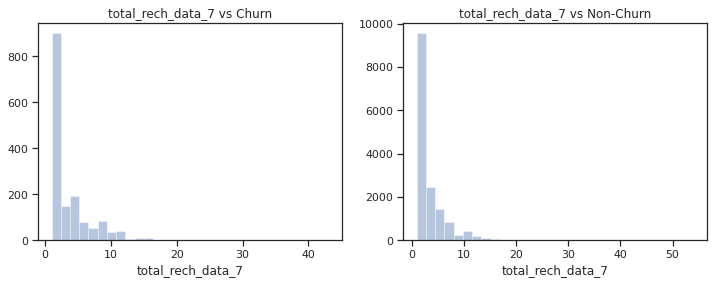

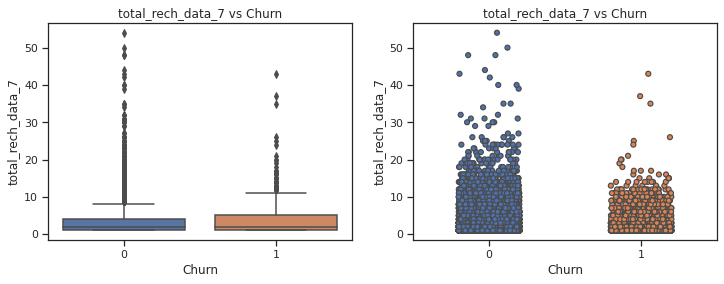

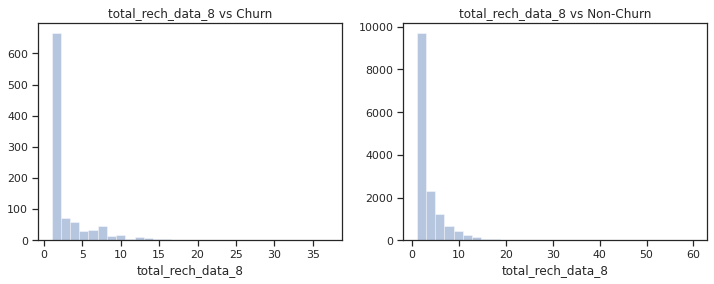

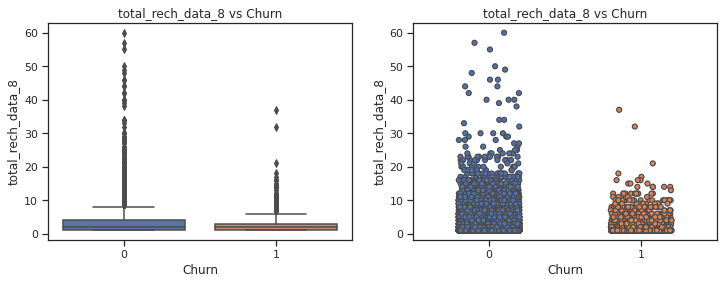

In [243]:
comparePlotsOfEachMonth(df_HighValueCustomer, total_rech_data)

#### vol_2g_mb (Consumption of 2g data)

In [244]:
vol_2g_mb = ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8']

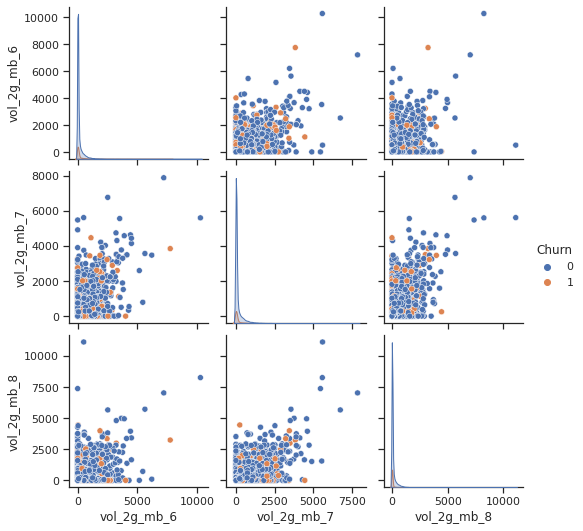

In [245]:
pairplot(df_HighValueCustomer, vol_2g_mb)

#### vol_3g_mb (Consumption of 3g data)

In [246]:
vol_3g_mb = ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']

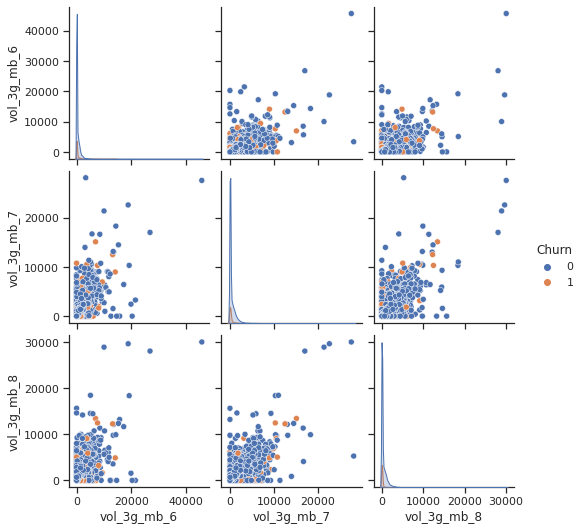

In [247]:
pairplot(df_HighValueCustomer, vol_3g_mb)

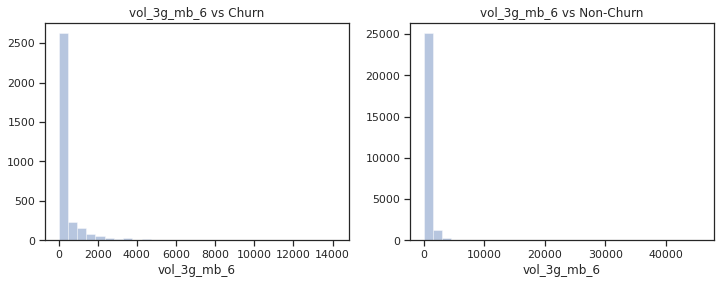

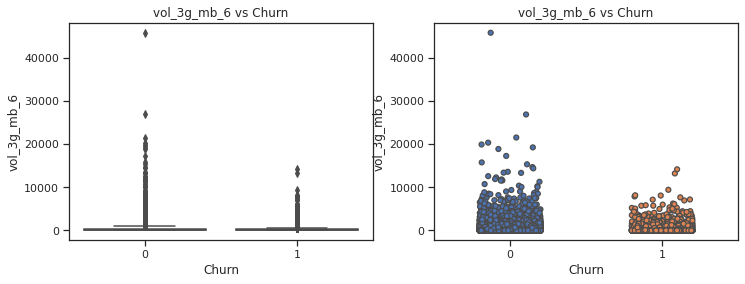

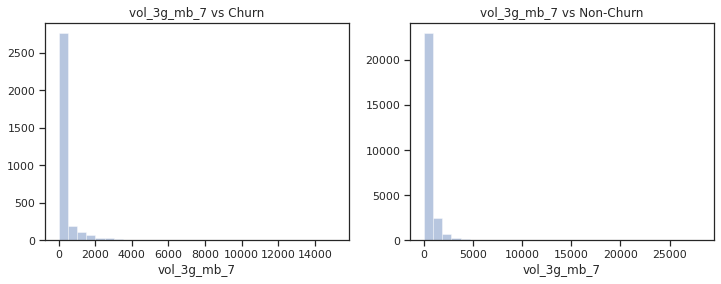

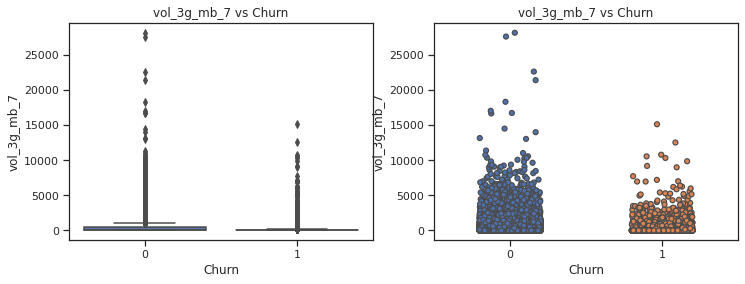

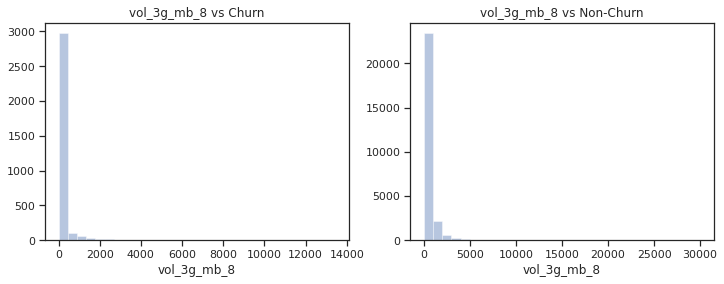

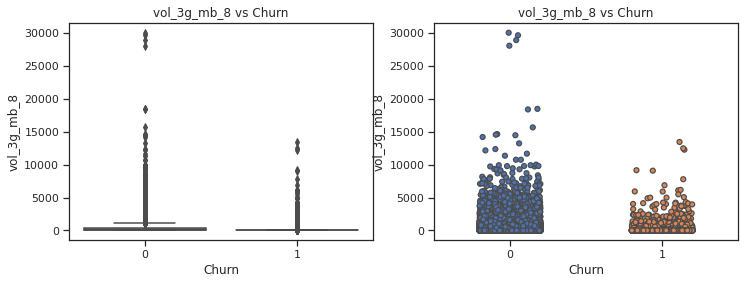

In [248]:
comparePlotsOfEachMonth(df_HighValueCustomer, vol_3g_mb)

#### vbc_3g_
Volume base cost paid per user

In [249]:
vbc_3g = ['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g']

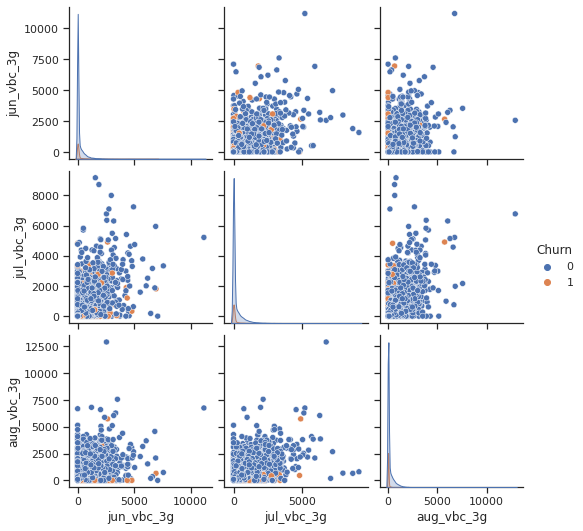

In [250]:
pairplot(df_HighValueCustomer, vbc_3g)

In [ ]:
comparePlotsOfEachMonth(df_HighValueCustomer, vbc_3g)

#### Average data and recharge amount

In [ ]:
total_amtCols= ['avg_rech_amt_6_7','total_data_call_rech_amt_8']

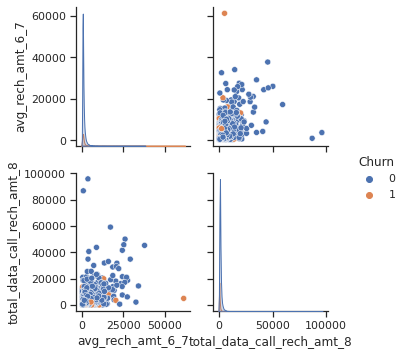

In [251]:
pairplot(df_HighValueCustomer, total_amtCols)

In [ ]:
comparePlotsOfEachMonth(df_HighValueCustomer, total_amtCols)

#### Saving File contain 6th and 7th month columns

In [252]:
# Saving csv file which contains the column dataframe
pd.DataFrame({'columns':list(df_HighValueCustomer.columns)}).to_csv('ColumnName.txt')

In [253]:
list(df_HighValueCustomer.columns)

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

## Derived Features

covert date columns into datetime columns so that we can use day and week for investigation purpose

In [254]:
object_columns = list(df_HighValueCustomer.select_dtypes(include=['object']).columns.values)
for column in object_columns:
  df_HighValueCustomer[column] = pd.to_datetime(df_HighValueCustomer[column])

list(df_HighValueCustomer.select_dtypes(include=['datetime']).columns.values)

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

#### Deriving some columns from datetime columns into day and week of the day for further investigation.

In [255]:
# for calling recharge
df_HighValueCustomer['date_of_last_rech_day_6'] = df_HighValueCustomer['date_of_last_rech_6'].dt.day
df_HighValueCustomer['date_of_last_rech_dayofweek_6'] = df_HighValueCustomer['date_of_last_rech_6'].dt.dayofweek.astype('str')

df_HighValueCustomer['date_of_last_rech_day_7'] = df_HighValueCustomer['date_of_last_rech_7'].dt.day
df_HighValueCustomer['date_of_last_rech_dayofweek_7'] = df_HighValueCustomer['date_of_last_rech_7'].dt.dayofweek.astype('str')

df_HighValueCustomer['date_of_last_rech_day_8'] = df_HighValueCustomer['date_of_last_rech_8'].dt.day
df_HighValueCustomer['date_of_last_rech_dayofweek_8'] = df_HighValueCustomer['date_of_last_rech_8'].dt.dayofweek.astype('str')


# for data recharge
df_HighValueCustomer['date_of_last_rech_data_day_6'] = df_HighValueCustomer['date_of_last_rech_data_6'].dt.day
df_HighValueCustomer['date_of_last_rech_data_dayofweek_6'] = df_HighValueCustomer['date_of_last_rech_data_6'].dt.dayofweek.astype('str')

df_HighValueCustomer['date_of_last_rech_data_day_7'] = df_HighValueCustomer['date_of_last_rech_data_7'].dt.day
df_HighValueCustomer['date_of_last_rech_data_dayofweek_7'] = df_HighValueCustomer['date_of_last_rech_data_7'].dt.dayofweek.astype('str')

df_HighValueCustomer['date_of_last_rech_data_day_8'] = df_HighValueCustomer['date_of_last_rech_data_8'].dt.day
df_HighValueCustomer['date_of_last_rech_data_dayofweek_8'] = df_HighValueCustomer['date_of_last_rech_data_8'].dt.dayofweek.astype('str')

In [256]:
joinCorr = df_HighValueCustomer.corr()
df_corr = pd.DataFrame(joinCorr.stack().reset_index().sort_values(by = 0, ascending = False))
df_corr = df_corr[((df_corr[0] < 1) & (df_corr[0] >= 0.4)) | ((df_corr[0] <= -0.4) & (df_corr[0] > -1))]
df_corr

level_0                       level_1     0
23019                   sachet_2g_8               count_rech_2g_8  0.99
18564               count_rech_2g_8                   sachet_2g_8  0.99
22852                   sachet_2g_7               count_rech_2g_7  0.99
18397               count_rech_2g_7                   sachet_2g_7  0.99
18230               count_rech_2g_6                   sachet_2g_6  0.98
22685                   sachet_2g_6               count_rech_2g_6  0.98
25721         total_data_rech_amt_8    total_data_call_rech_amt_8  0.98
26216    total_data_call_rech_amt_8         total_data_rech_amt_8  0.98
26049    total_data_call_rech_amt_7         total_data_rech_amt_7  0.97
25554         total_data_rech_amt_7    total_data_call_rech_amt_7  0.97
25387         total_data_rech_amt_6    total_data_call_rech_amt_6  0.97
25882    total_data_call_rech_amt_6         total_data_rech_amt_6  0.97
15939              total_rech_amt_8                        arpu_8  0.96
594                          arpu_8              total_rech_amt_8  0.96
7513                   isd_og_mou_8                  isd_og_mou_6  0.95
7183                   isd_og_mou_6                  isd_og_mou_8  0.95
7514                   isd_og_mou_8                  isd_og_mou_7  0.95
7349                   isd_og_mou_7                  isd_og_mou_8  0.95
260                          arpu_6              total_rech_amt_6  0.95
15605              total_rech_amt_6                        arpu_6  0.95
427                          arpu_7              total_rech_amt_7  0.94
15772              total_rech_amt_7                        arpu_7  0.94
21540                     arpu_2g_8                     arpu_3g_8  0.94
21045                     arpu_3g_8                     arpu_2g_8  0.94
7182                   isd_og_mou_6                  isd_og_mou_7  0.93
7347                   isd_og_mou_7                  isd_og_mou_6  0.93
21206                     arpu_2g_6                     arpu_3g_6  0.93
20711                     arpu_3g_6                     arpu_2g_6  0.93
21373                     arpu_2g_7                     arpu_3g_7  0.93
20878                     arpu_3g_7                     arpu_2g_7  0.93
10703                  loc_ic_mou_6                total_ic_mou_6  0.90
13178                total_ic_mou_6                  loc_ic_mou_6  0.90
17234             total_rech_data_6                   sachet_2g_6  0.90
22679                   sachet_2g_6             total_rech_data_6  0.90
11037                  loc_ic_mou_8                total_ic_mou_8  0.89
13512                total_ic_mou_8                  loc_ic_mou_8  0.89
22846                   sachet_2g_7             total_rech_data_7  0.89
17401             total_rech_data_7                   sachet_2g_7  0.89
18197               count_rech_2g_6             total_rech_data_6  0.89
17207             total_rech_data_6               count_rech_2g_6  0.89
18364               count_rech_2g_7             total_rech_data_7  0.89
17374             total_rech_data_7               count_rech_2g_7  0.89
17568             total_rech_data_8                   sachet_2g_8  0.89
23013                   sachet_2g_8             total_rech_data_8  0.89
13345                total_ic_mou_7                  loc_ic_mou_7  0.88
10870                  loc_ic_mou_7                total_ic_mou_7  0.88
18531               count_rech_2g_8             total_rech_data_8  0.88
17541             total_rech_data_8               count_rech_2g_8  0.88
19068               count_rech_3g_8                   sachet_3g_8  0.88
24018                   sachet_3g_8               count_rech_3g_8  0.88
1029                    onnet_mou_8              std_og_t2t_mou_8  0.86
5484               std_og_t2t_mou_8                   onnet_mou_8  0.86
862                     onnet_mou_7              std_og_t2t_mou_7  0.86
5317               std_og_t2t_mou_7                   onnet_mou_7  0.86
695                     onnet_mou_6              std_og_t2t_mou_6  0

We can see from above data that there is high correlation between same colmns only the diff in month.<br>
How to handle these columns, one thing we can do is to compare the data of Good Phase and Action phase.
Which can bring some insight about data. Will reduce the high correlated column after that

In [ ]:
month_6_7_cols = pd.DataFrame(
    {'month6':[month6 for month6 in 
               list(df_HighValueCustomer.select_dtypes(include=['float64', 'int64','int32']).columns
                   ) if Constants.UNDERSCORE_6 in month6 if Constants.UNDERSCORE_7 not in month6], 
     'month7':[month7 for month7 in list(df_HighValueCustomer.select_dtypes(include=['float64', 'int64','int32']).columns
                   ) if Constants.UNDERSCORE_7 in month7 if Constants.UNDERSCORE_6 not in month7],
     'month8':[month8 for month8 in list(df_HighValueCustomer.select_dtypes(include=['float64', 'int64','int32']).columns
                   ) if Constants.UNDERSCORE_8 in month8 if Constants.UNDERSCORE_6 not in month8 and Constants.UNDERSCORE_7 not in month8]
    }).sort_values(['month6', 'month7', 'month8'], ascending = True)

In [257]:
month_6_7_cols.head()

month6              month7              month8
42           arpu_2g_6           arpu_2g_7           arpu_2g_8
41           arpu_3g_6           arpu_3g_7           arpu_3g_8
0               arpu_6              arpu_7              arpu_8
38  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8
36     count_rech_2g_6     count_rech_2g_7     count_rech_2g_8

In [258]:
len(month_6_7_cols['month6']) + len(month_6_7_cols['month7'])

106

In [259]:
for month6, month7 in zip(month_6_7_cols.month6, month_6_7_cols.month7):
  df_HighValueCustomer['avg_' + month6.strip('_6') + Constants.UNDERSCORE_6 + Constants.UNDERSCORE_7] = df_HighValueCustomer[[month6, month7]].mean(axis = 1)
  dropColList.append(month6)
  dropColList.append(month7)


df_HighValueCustomer['vbc_3g_6_7'] = df_HighValueCustomer[['jun_vbc_3g', 'jul_vbc_3g']].mean(axis = 1) 
dropColList.append('jun_vbc_3g')
dropColList.append('jul_vbc_3g')

Creating month on month changes in features to get information from there

In [ ]:
for month6, month7, month8 in zip(month_6_7_cols.month6, month_6_7_cols.month7, month_6_7_cols.month8):
  df_HighValueCustomer[month6.strip('_6') + '_7diff6'] = df_HighValueCustomer[month7] - df_HighValueCustomer[month6]
  df_HighValueCustomer[month6.strip('_6') + '_8diff7'] = df_HighValueCustomer[month8] - df_HighValueCustomer[month7]


df_HighValueCustomer['vbc_3g_7diff6'] = df_HighValueCustomer['jul_vbc_3g'] - df_HighValueCustomer['jun_vbc_3g']
df_HighValueCustomer['vbc_3g_8diff7'] = df_HighValueCustomer['aug_vbc_3g'] - df_HighValueCustomer['jul_vbc_3g']

In [260]:
# df_HighValueCustomer = pd.read_csv('HighValueCustomer.csv')
# dropColList = pd.read_csv('RemovedColumns.csv')

In [261]:
dropColList.extend(object_columns)

In [262]:
# Saving column list which we want to remove from the dataset
df_HighValueCustomer.to_csv('HighValueCustomer.csv')
dropColList = list(set(dropColList))
pd.DataFrame({'RemovedColumns': dropColList}).to_csv('RemovedColumns.csv')

#### What feature selection techniques could be used to reduce the number of features? 

There are several ways for feature selection:
To begin with all feature selection starts with some business domain knowledge. Variables that are relevant, available prior to modeling should be used. 
- Variables with no variance or single value should be eliminated. We did such an analysis of understanding the data and eliminated the variables. 
- Nominal data with no specific relevant to the modeling exercise can be removed- like mobile_number. 
- Variables like Date can be converted to numerical by extracting features like day of a week, day of a month etc.
- Categorical variables have to be encoded as dummy variables

Other more automated methods for feature selection are:
1) Filter Methods – features are selected on the basis of their scores in various statistical tests for their relationship with the outcome variable. Eg: Correlation, Anova, Chi-square test 
2)	Wrapper Methods – Is like a search problem and is iterative.  We add/delete a subset of features, train a model iteratively until the best possible model is found. Examples are:
    - Forward selection
    - Backward selection
    - Recursive feature elimination


3)	Embedded Methods - Embedded methods combine the qualities of both filter and wrapper methods. These Algorithms that have their own built-in feature selection methodology implement it. Examples are:
    - Lasso Regression
    - Random Forest with Gini coefficient
    - Gradient boosting with feature importance


In [ ]:
dropColList

In [ ]:
df_HighValueCustomer.drop(dropColList, axis=1, inplace= True)
df_HighValueCustomer.shape

In [263]:
abs_corr_matrix = df_HighValueCustomer.corr().abs()
abs_corr_matrix

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
abs_corr_matrix.to_csv('Correlation_Matrix.csv')

In [ ]:
abs_corr_matrix = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k =1).astype('bool'))
highlyCorrelatedIndices = np.where(abs_corr_matrix > 0.85)

In [264]:
highlyCorrelatedIndices

(array([  1,   2,  13,  14,  21,  34,  35,  38,  39,  49,  49,  53,  55,
         57,  57,  66,  82,  85,  97, 107, 108, 115, 115, 116, 116, 118,
        133, 161, 162, 165, 166, 171, 172, 187, 188, 195, 196]),
 array([ 10,  11,  17,  64,  26,  42,  44,  39,  43,  97,  98,  54, 101,
         85, 102,  99,  96, 102,  98, 109, 110, 171, 205, 172, 206, 174,
        199, 191, 192, 193, 194, 205, 206, 201, 202, 197, 198]))

In [265]:
 correlated_pairs = [(abs_corr_matrix.index[x], abs_corr_matrix.index[y]) for x, y in zip(*highlyCorrelatedIndices) if x != y and x < y]
 print('total number of correlated pairs', len(correlated_pairs))
 correlated_pairs

total number of correlated pairs 37


[('arpu_6', 'roam_ic_mou_6'),
 ('arpu_7', 'roam_ic_mou_7'),
 ('roam_og_mou_6', 'loc_og_t2t_mou_7'),
 ('roam_og_mou_7', 'loc_ic_mou_6'),
 ('loc_og_t2m_mou_8', 'loc_og_t2c_mou_7'),
 ('std_og_t2m_mou_6', 'std_og_mou_8'),
 ('std_og_t2m_mou_7', 'isd_og_mou_7'),
 ('std_og_t2f_mou_7', 'std_og_t2f_mou_8'),
 ('std_og_t2f_mou_8', 'isd_og_mou_6'),
 ('og_others_6', 'max_rech_amt_6'),
 ('og_others_6', 'max_rech_amt_7'),
 ('total_og_mou_7', 'total_og_mou_8'),
 ('loc_ic_t2t_mou_6', 'last_day_rch_amt_7'),
 ('loc_ic_t2t_mou_8', 'isd_ic_mou_6'),
 ('loc_ic_t2t_mou_8', 'last_day_rch_amt_8'),
 ('loc_ic_mou_8', 'max_rech_amt_8'),
 ('spl_ic_mou_6', 'total_rech_amt_8'),
 ('isd_ic_mou_6', 'last_day_rch_amt_8'),
 ('max_rech_amt_6', 'max_rech_amt_7'),
 ('max_rech_data_7', 'count_rech_2g_6'),
 ('max_rech_data_8', 'count_rech_2g_7'),
 ('av_rech_amt_data_6', 'avg_count_rech_3g_6_7'),
 ('av_rech_amt_data_6', 'avg_std_ic_t2t_mou_6_7'),
 ('av_rech_amt_data_7', 'avg_date_of_last_rech_data_day_6_7'),
 ('av_rech_amt_data

In [266]:
corr_mat = df_HighValueCustomer.corr()
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k =1).astype('bool'))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85) or  any(upper[column] < -0.85)]

In [ ]:
df_HighValueCustomer.drop(to_drop, axis=1, inplace=True)

In [ ]:
df_HighValueCustomer.shape

In [267]:
list(df_HighValueCustomer.select_dtypes(include=[object]).columns)

['date_of_last_rech_dayofweek_6',
 'date_of_last_rech_dayofweek_7',
 'date_of_last_rech_dayofweek_8',
 'date_of_last_rech_data_dayofweek_6',
 'date_of_last_rech_data_dayofweek_7',
 'date_of_last_rech_data_dayofweek_8']

In [268]:
df_HighValueCustomer.drop(list(df_HighValueCustomer.select_dtypes(include=['object', 'category']).columns), axis=1, inplace=True)

In [269]:
df_HighValueCustomer.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 226 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   mobile_number                       29953 non-null  int64         
 1   arpu_6                              29953 non-null  float64       
 2   arpu_7                              29953 non-null  float64       
 3   arpu_8                              29953 non-null  float64       
 4   onnet_mou_6                         29411 non-null  float64       
 5   onnet_mou_7                         29417 non-null  float64       
 6   onnet_mou_8                         28781 non-null  float64       
 7   offnet_mou_6                        29411 non-null  float64       
 8   offnet_mou_7                        29417 non-null  float64       
 9   offnet_mou_8                        28781 non-null  float64       
 10  roam_ic_mou_6        

As we discussed, lets fill with zeros

In [270]:
df_HighValueCustomer.replace([np.inf, -np.inf], np.nan, inplace=True)
df_HighValueCustomer.fillna(0, inplace=True)

In [271]:
df_HighValueCustomer.isnull().sum()

mobile_number                         0
arpu_6                                0
arpu_7                                0
arpu_8                                0
onnet_mou_6                           0
onnet_mou_7                           0
onnet_mou_8                           0
offnet_mou_6                          0
offnet_mou_7                          0
offnet_mou_8                          0
roam_ic_mou_6                         0
roam_ic_mou_7                         0
roam_ic_mou_8                         0
roam_og_mou_6                         0
roam_og_mou_7                         0
roam_og_mou_8                         0
loc_og_t2t_mou_6                      0
loc_og_t2t_mou_7                      0
loc_og_t2t_mou_8                      0
loc_og_t2m_mou_6                      0
loc_og_t2m_mou_7                      0
loc_og_t2m_mou_8                      0
loc_og_t2f_mou_6                      0
loc_og_t2f_mou_7                      0
loc_og_t2f_mou_8                      0


Saving dataframe to use further because this is preprocessed data frame

In [272]:
df_HighValueCustomer.to_csv(Constants.FILENAME_HIGHVALUECUSTOMER+'.csv')

Now will create different model on this dataset. And apply scaling so that it can make algorithm work fast.

In [ ]:
X = df_HighValueCustomer[df_HighValueCustomer.columns[~df_HighValueCustomer.columns.isin(['Churn'])]]
Y = df_HighValueCustomer['Churn']

In [ ]:
print(X.shape)

# Feature Scaling

In [273]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size = 0.20, random_state = 45)

In [275]:
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

X_train:  (23962, 181)
y_train:  (23962,)
X_test:  (5991, 181)
y_test:  (5991,)


# PCA

In [276]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state =Constants.RANDOM_STATE)

In [277]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [ ]:
print(pca.components_.shape)
print(len(list(X.columns)))

In [278]:
cols = list(X.columns)

pca_df = pd.DataFrame({'PCA1': pca.components_[0], 'PCA2': pca.components_[1], 'feature': cols})
pca_df.head()

PCA1  PCA2        feature
0 -0.01  0.25         arpu_8
1 -0.10  0.12    onnet_mou_8
2 -0.11  0.19   offnet_mou_8
3 -0.01  0.02  roam_ic_mou_8
4 -0.02  0.03  roam_og_mou_8

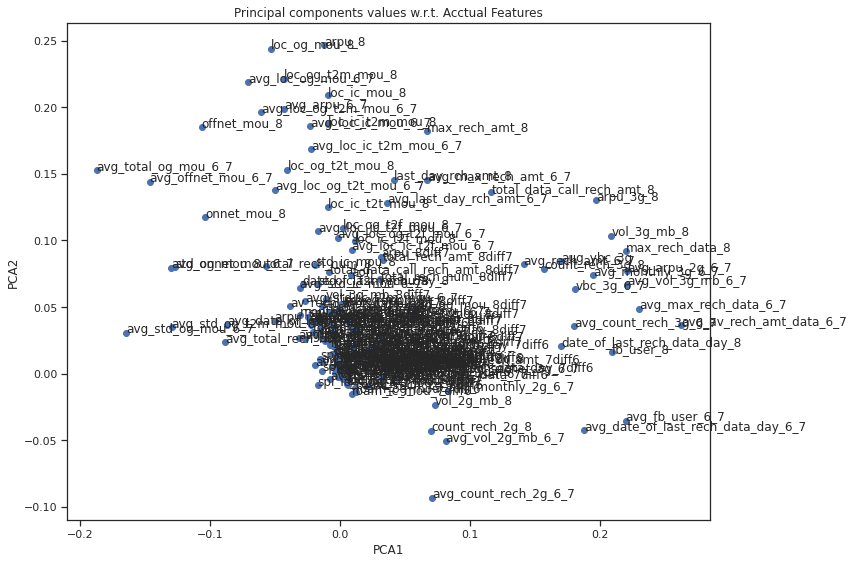

In [279]:
plt.figure(figsize = (12,8))
plt.scatter(pca_df.PCA1, pca_df.PCA2)
plt.xlabel("PCA1")
plt.ylabel('PCA2')
plt.title('Principal components values w.r.t. Acctual Features')
for i, text  in enumerate(pca_df.feature):
  plt.annotate(text, (pca_df.PCA1[i], pca_df.PCA2[i]))

plt.tight_layout()
plt.show()


In [280]:
pca.explained_variance_ratio_

array([5.73062178e-02, 4.63219621e-02, 4.16086230e-02, 3.27221231e-02,
       2.85185646e-02, 2.67090401e-02, 2.40890140e-02, 2.15412965e-02,
       1.85785921e-02, 1.71596527e-02, 1.66872313e-02, 1.56656709e-02,
       1.55083825e-02, 1.53872884e-02, 1.46461637e-02, 1.43204094e-02,
       1.36062098e-02, 1.30370380e-02, 1.29935124e-02, 1.19679682e-02,
       1.18720957e-02, 1.14816387e-02, 1.13832392e-02, 1.13477033e-02,
       1.10350233e-02, 1.06992943e-02, 1.05515301e-02, 1.02121446e-02,
       1.00723570e-02, 9.75888232e-03, 9.69381515e-03, 9.04319986e-03,
       8.92795843e-03, 8.88805320e-03, 8.82459055e-03, 8.66414702e-03,
       8.59910572e-03, 8.50505195e-03, 8.39821983e-03, 8.18597619e-03,
       7.98522785e-03, 7.79047146e-03, 7.65237364e-03, 7.47454992e-03,
       7.43849378e-03, 7.31633404e-03, 7.16600150e-03, 7.10931251e-03,
       7.04210052e-03, 6.95172275e-03, 6.86383740e-03, 6.77850698e-03,
       6.63438882e-03, 6.59140883e-03, 6.56407040e-03, 6.38125832e-03,
      

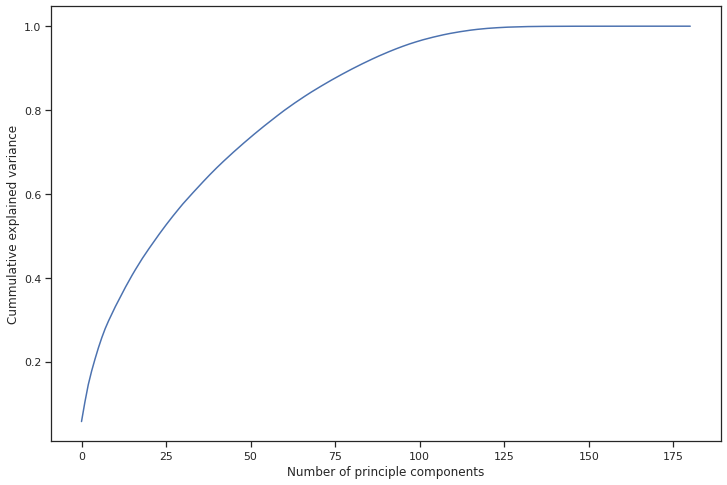

In [281]:
#Scree Plot
plt.figure(figsize=(12,8))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of principle components')
plt.ylabel('Cummulative explained variance')
plt.show()

In [282]:
print(pca.explained_variance_ratio_.cumsum())

[0.05730622 0.10362818 0.1452368  0.17795893 0.20647749 0.23318653
 0.25727554 0.27881684 0.29739543 0.31455509 0.33124232 0.34690799
 0.36241637 0.37780366 0.39244982 0.40677023 0.42037644 0.43341348
 0.44640699 0.45837496 0.47024706 0.48172869 0.49311193 0.50445964
 0.51549466 0.52619396 0.53674549 0.54695763 0.55702999 0.56678887
 0.57648268 0.58552588 0.59445384 0.6033419  0.61216649 0.62083063
 0.62942974 0.63793479 0.64633301 0.65451899 0.66250421 0.67029469
 0.67794706 0.68542161 0.6928601  0.70017644 0.70734244 0.71445175
 0.72149385 0.72844557 0.73530941 0.74208792 0.74872231 0.75531372
 0.76187779 0.76825905 0.77460997 0.78091067 0.78717049 0.79339272
 0.79941587 0.80524535 0.81099755 0.81659371 0.82210588 0.82747132
 0.83281258 0.83803729 0.84316154 0.84809026 0.85301356 0.85779847
 0.86254941 0.86721304 0.87185214 0.87638103 0.88084271 0.88523254
 0.88955994 0.89383951 0.89805184 0.90217599 0.90626088 0.91023934
 0.91417193 0.91802039 0.92179764 0.92555572 0.92914999 0.9326

In [283]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components = 75)

In [284]:
ipca_train_df = ipca.fit_transform(X_train)

In [ ]:
ipca.explained_variance_ratio_.cumsum()

In [285]:
ipca_train_df.shape

(23962, 75)

In [286]:
ipca_train_df

array([[-4.58727429e+00,  2.71763752e+00, -3.15920311e+00, ...,
         1.53943484e-03, -8.74447706e-01,  1.75733058e+00],
       [-3.51749328e-02,  2.32473151e+00,  1.25388394e+00, ...,
        -3.75968666e-01,  2.40332617e-02,  1.00305145e+00],
       [ 4.94328479e-01, -2.82179704e+00,  3.17631519e+00, ...,
        -5.75451918e-02,  4.23545431e-01,  1.71509926e-01],
       ...,
       [-1.76961816e+00,  1.60285495e+00, -5.44190849e+00, ...,
         5.01705209e-01, -1.71246860e+00,  1.66005072e+00],
       [-4.30150105e+00,  6.64242446e+00,  3.95222450e-01, ...,
         1.10696690e+00,  5.92733393e-01, -1.22433694e+00],
       [ 2.33262028e-01,  5.27000941e-01, -3.15637929e-01, ...,
         1.27649752e+00, -1.84600546e-01, -6.52160666e-01]])

In [287]:
ipca_test_df = ipca.transform(X_test)

#### Will use below models for predictions
1.   Logistic Regression
2.   SVM
3.   Random Forest
4.   AdaBoost
5.   Gradien Boost (tree)
6.   XB Boost



# Lift Metric
What is lift metric?

Lift measures expected benefit with the predictive model compared to a base line model – in essence a random choice. It is the ratio of proportion of the gain to the proportion of random expectation at any given decile level. The random expectation at the xth decile is x%.

In [288]:
def PlotLiftMatric(actual, predicted, title):
  plt.figure(figsize=(10, 4))
  df = pd.DataFrame({'actual':actual, 'pred':predicted})
  pred_rank = pd.qcut(df['pred'].rank(method = 'first'), 100, labels=False)
  pred_percentile = df.groupby(pred_rank).mean()
  plt.title(title)
  plt.plot(np.arange(0.01, 1.01, 0.01), pred_percentile['pred'],
           color = 'darkorange', lw = 2, label = 'Predicted')
  plt.plot(np.arange(0.01, 1.01, 0.01), pred_percentile['actual'],
           color = 'blue', linestyle = '--', label = 'Actual')
  plt.xlabel('Prediction Percentile')
  plt.ylabel('Targeted Percentile')
  plt.xlim([0.0, 1.0])
  plt.ylim([-0.05, 1.05])
  plt.legend(loc = 'best')
  plt.show()  

## Choice of Evaluation Metric

Choosing a metric is one of the key criteria for our analysis, as the dataset is imbalanced one

<br>

![Image of Yaktocat](https://miro.medium.com/max/534/1*Z54JgbS4DUwWSknhDCvNTQ.png)

<br>
*Source: Wikipedia*

**Accuracy = correct predictions / total predictions = (TP + TN)/ (all)**
For a data set which is balanced, this might make a good measure. For an imbalanced dataset like the current one, where the negative class is heavier, this measure may show a high accuracy but fail to serve the purpose of the modeling exercise. We need to be able to predict non-churn i.e.; positive outcomes correctly to help business. So Accuracy may not be the best measure here.

**Recall(sensitivity) = ability to identify Positives as true =  TP/(TP + FN)**
Considering that we wish to clearly identify customers who might churn vs non-churn, recall as a metric with its ability to identify true positives might be more apt. But this does not capture models ability to mis-classify negative class as positive i.e.; False positive rate. So, if we choose a model purely based on recall, we might be blind sighted by a huge number of false positive.

**Precision = TP/ (TP + FP) = Positive predictive value:**
It is important to not only understand the rate of identifying positives as true but also identify False positives. If business is to make a decision on marketing spend to retain customers to all positive output of the model, it becomes important that the false positive rate should not be too high. So Precision as a metric - which provides the rate of true positive /total predicted positives is an apt metric to look at here.

**F Score = 2 * Precision * Recall/ (Precision * Recall):**
Fscore is the harmonic mean of Precision and Recall and provides the ability to balance the need between having a better true positive rate and not too high a false positive rate. 

**Area under the Curve:**

AUC or in the classification world – AUC ROC – Area under the curve for  Receiver Operating Characteristic curve is generally used to compare two different models. It used two metrics from the confusion matrix the true positive rate and false positive rate.

**True positive rate (TPR), recall** as described above is proportion of positive data points correctly identified as positive by the model
**False positive rate (FPR)**, which is defined as FP/(FP+TN) is all the negative data points that are mistakenly identified as positive as a proportion of all negative data points. 

The TPR and FPR metrics are calculated for several threshold values and a curve is plotted with these. The resulting curve is called ROC. AUC is the computation of the area under ROC curve. For a model selection, we always look for maximizing the AUC for the classifier. As this value is comparable across models.

In [289]:
def ClassificationMetricAndRocCurve(actual, predicted, pred_prob, result_df, algo_Name, scenario):
  print(classification_report(actual, predicted))
  accuracy = accuracy_score(actual, predicted)
  print('Accuracy of the test data','{:2.2f}'.format(accuracy))
  fpr, tpr, thresholds = roc_curve(actual, pred_prob)
  roc_auc = auc(fpr, tpr)
  threshold = thresholds[np.argmax(tpr - fpr)]
  result_df = result_df.append(pd.DataFrame({'Algorithm_Name':algo_Name, 'Scenario':scenario, 'ROC_score': round(roc_auc, 2), 'threshold':round(threshold, 2)}, index = [0]), ignore_index=True)
  print("threshold: {:0.2}".format(threshold))
  print('ROC score for the test data','{:0.2%}'.format(roc_auc))
  plt.plot(fpr, tpr, label = "Test " + "=" + str(roc_auc))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.legend(loc = 4)
  plt.show()
  result_df.drop_duplicates(inplace=True)
  return result_df


In [290]:
def PlotConfusionMatrix(actual, predicted):
  cm = confusion_matrix(actual, predicted)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1, shape=(10,6))
  className = ['Non-Churn', 'Churn']
  plt.title("Confusion Matrix: Actual vs Predicted")
  plt.xlabel("Predicted Label")
  plt.ylabel('Actual Label')
  x_ticks = np.arange(len(className))
  plt.xticks(x_ticks, className, rotation = 45)
  plt.yticks(x_ticks, className)
  s = [['TN', 'FP'],['FN','TP']]

  for i in range(2):
    for j in range(2):
      plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]), fontdict={'fontsize':12})
  plt.show()

#### Creating DataFrame which will contains performance Information on Model so that we can compare it.

In [292]:
result_df = pd.DataFrame(columns=['Algorithm_Name', 'Scenario', 'ROC_score', 'threshold'])

## Logistic Regression with Default parameter
Using default parameter

In [ ]:
ipca_train_df.shape

(23962, 75)

In [ ]:
lr_default = LogisticRegression()

lr_pca_model = lr_default.fit(ipca_train_df, y_train)
y_pred = lr_pca_model.predict(ipca_test_df)
y_pred_prob = lr_pca_model.predict_proba(ipca_test_df)[:,1]
'{:2.2f}'.format(roc_auc_score(y_true=y_test, y_score= y_pred_prob))

'0.88'

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5330
           1       0.64      0.29      0.40       661

    accuracy                           0.90      5991
   macro avg       0.78      0.64      0.67      5991
weighted avg       0.89      0.90      0.89      5991

Accuracy of the test data 0.90
threshold: 0.14
ROC score for the test data 88.24%


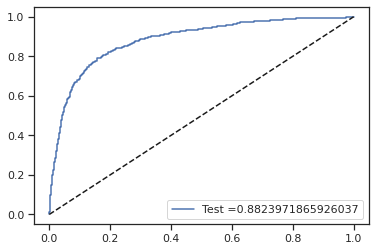

Algorithm_Name         Scenario  ROC_score  \
0  Logistic Regression with Default paramter  Incremental PCA       0.88   

   threshold  
0       0.14

In [ ]:
result_df = ClassificationMetricAndRocCurve(y_test, y_pred, y_pred_prob, result_df, "Logistic Regression with Default paramter", Constants.INCREMENT_PCA)
result_df

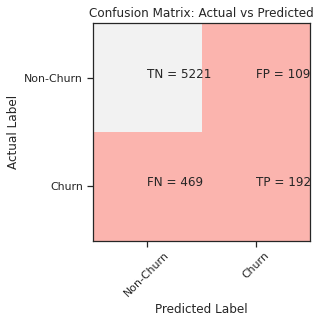

In [ ]:
PlotConfusionMatrix(y_test, y_pred)

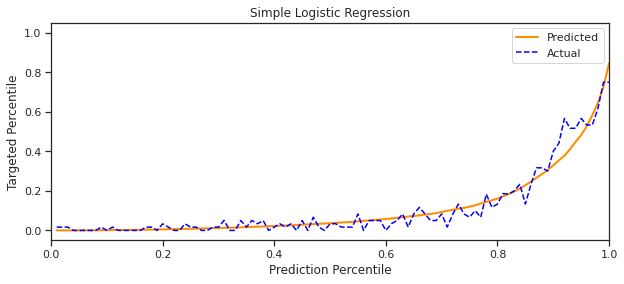

In [ ]:
PlotLiftMatric(y_test, y_pred_prob, 'Simple Logistic Regression')

## Logistic Regression with penalty (l2)

In [ ]:
log_penalty = LogisticRegression(class_weight='balanced', C=1000000, penalty='l2', solver='newton-cg', random_state=999, n_jobs=-1)
log_model_cv = log_penalty.fit(ipca_train_df, y_train)

In [ ]:
y_pred_lr = log_model_cv.predict(ipca_test_df)
y_pred_prob_lr = log_model_cv.predict_proba(ipca_test_df)[:, 1]

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5330
           1       0.64      0.29      0.40       661

    accuracy                           0.90      5991
   macro avg       0.78      0.64      0.67      5991
weighted avg       0.89      0.90      0.89      5991

Accuracy of the test data 0.90
threshold: 0.14
ROC score for the test data 88.24%


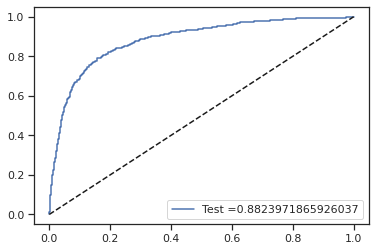

Algorithm_Name         Scenario  ROC_score  \
0  Logistic Regression with Default paramter  Incremental PCA       0.88   
1        Logistic Regression with L2 Penalty  Incremental PCA       0.88   

   threshold  
0       0.14  
1       0.14

In [ ]:
result_df = ClassificationMetricAndRocCurve(y_test, y_pred, y_pred_prob, result_df, 'Logistic Regression with L2 Penalty', Constants.INCREMENT_PCA)
result_df

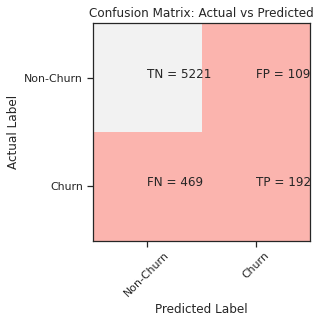

In [ ]:
PlotConfusionMatrix(y_test, y_pred)

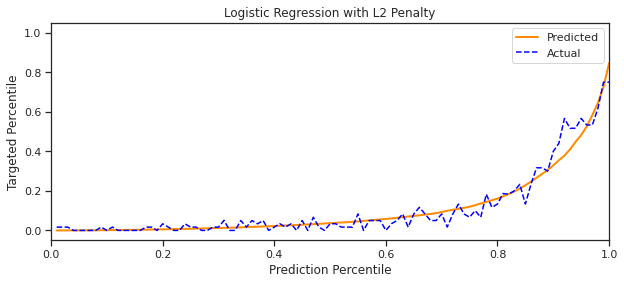

In [ ]:
PlotLiftMatric(y_test, y_pred_prob, 'Logistic Regression with L2 Penalty')

### Random Forest 
<br>

Random forest algorithm is based on a concept called bagging - bootstrap aggregating. In random forest, we build a number of decision trees on bootstrap training samples. The samples are chosen, as split candidates from all the X variables (predictors). <br>
So, the random forest at each split is allowed to consider a subset of the predictors. If not, One or Few strong predictors, might always become the most important predictor leading to similar looking trees. Which leads to no reduction in the variance. This process can be thought of as de-correlating the trees or feature bagging. Because of this, the Random forest can also be used to rank the importance of variables. <br>
Similarly bootstrapping of sample rows is also done. <br>


Let's first fit a random forest model with default hyperparameters.

In [ ]:
rf_default  = RandomForestClassifier(n_estimators=50, 
                                     criterion='gini', 
                                     max_depth=None, 
                                     min_samples_split=500,
                                     min_samples_leaf = 1,
                                     min_weight_fraction_leaf = 0.0,
                                     max_features ='auto',
                                     max_leaf_nodes = None,
                                     min_impurity_decrease = 0.0,
                                     min_impurity_split = 1e-07,
                                     bootstrap = True,
                                     oob_score = False,
                                     n_jobs = None,
                                     random_state= 999,
                                     verbose = 0,
                                     warm_start = False,
                                     class_weight = 'balanced_subsample',
                                     max_samples = 0.5                                     
                                     )

In [ ]:
rf_default.fit(ipca_train_df, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=0.5, min_impurity_decrease=0.0,
                       min_impurity_split=1e-07, min_samples_leaf=1,
                       min_samples_split=500, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=999, verbose=0, warm_start=False)

In [ ]:
y_pred_rf = rf_default.predict(ipca_test_df)
y_pred_prob_rf = rf_default.predict_proba(ipca_test_df)[:, 1]

In [ ]:
'{:2.2f}'.format(roc_auc_score(y_true=y_test, y_score= y_pred_prob))

'0.88'

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      5330
           1       0.37      0.74      0.49       661

    accuracy                           0.83      5991
   macro avg       0.67      0.79      0.70      5991
weighted avg       0.90      0.83      0.86      5991

Accuracy of the test data 0.83
threshold: 0.47
ROC score for the test data 86.81%


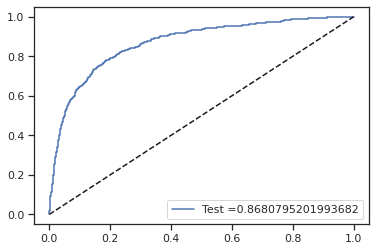

Algorithm_Name         Scenario  ROC_score  \
0  Logistic Regression with Default paramter  Incremental PCA       0.88   
1        Logistic Regression with L2 Penalty  Incremental PCA       0.88   
2       Random Forest with default parameter  Incremental PCA       0.87   

   threshold  
0       0.14  
1       0.14  
2       0.47

In [ ]:
result_df = ClassificationMetricAndRocCurve(y_test, y_pred_rf, y_pred_prob_rf, result_df, 'Random Forest with default parameter', Constants.INCREMENT_PCA)
result_df

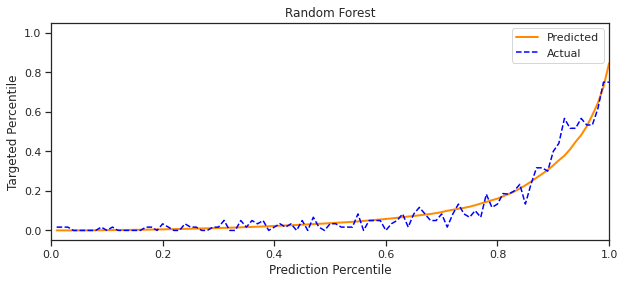

In [ ]:
PlotLiftMatric(y_test.values, y_pred_prob, "Random Forest")

In [ ]:
important_features = rf_default.feature_importances_
important_features[::-1].sort()
important_features

array([0.33875149, 0.10832812, 0.04166107, 0.03245508, 0.02865613,
       0.02081622, 0.0189513 , 0.01834517, 0.01689937, 0.01662432,
       0.01626117, 0.01602106, 0.01587306, 0.01577442, 0.01483318,
       0.01390961, 0.01366504, 0.01063271, 0.01037407, 0.01000593,
       0.00993346, 0.00937556, 0.00908561, 0.00833338, 0.00825612,
       0.0078947 , 0.00712656, 0.0068104 , 0.00670809, 0.00643266,
       0.00639988, 0.00607405, 0.00598531, 0.00588726, 0.00586784,
       0.00570542, 0.00486323, 0.00465049, 0.00444567, 0.00443396,
       0.00442424, 0.0042411 , 0.00417349, 0.00382174, 0.00372411,
       0.00361968, 0.00360743, 0.00358519, 0.00334366, 0.00331669,
       0.00324436, 0.00294789, 0.00294166, 0.00292665, 0.00285758,
       0.00255978, 0.00236784, 0.00232586, 0.00229672, 0.00226366,
       0.00219057, 0.00193323, 0.00188282, 0.00186747, 0.00182775,
       0.00179249, 0.00178975, 0.00173824, 0.00167659, 0.00150328,
       0.00107359, 0.00096038, 0.00077902, 0.00067124, 0.00061

### Gradient boosting
<br>
Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set. <br> 

Gradient boosting uses the concept of boosting. It also fits separate decision trees to the training data set but the trees are grown sequentially essentially to fix the mistakes of the previous tree. This is why, boosting is called the ensemble of weak prediction models. Suppose the gradient boosting model starts with a weak model Fm. In the next iteration it tries to add to the previous weak model, in such a way, that the prediction becomes stronger, i.e; <br>
>                           Fm+1(x) =  Fm (x) + h(x)= y

Here h is essentially a residual from the previous model, so gradient boosting is a generalization of the gradient decent algorithm that reduces the residuals.

In [ ]:
gbc = GradientBoostingClassifier(n_estimators= 200,
                                 loss = 'deviance',
                                 learning_rate = 0.01,
                                 subsample = 0.5,
                                 criterion = 'friedman_mse',
                                 min_samples_split = 500,
                                 min_samples_leaf = 10,
                                 min_weight_fraction_leaf = 0.0,
                                 max_depth = 3,
                                 min_impurity_decrease = 0.0,
                                 min_impurity_split = None,
                                 random_state = 999,
                                 max_features = None,
                                 verbose = 1,
                                 max_leaf_nodes = 10
                                 )

In [ ]:
gbc.fit(ipca_train_df, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6739           0.0047            1.26m
         2           0.6846           0.0046            1.25m
         3           0.6810           0.0043            1.26m
         4           0.6772           0.0041            1.27m
         5           0.6610           0.0042            1.25m
         6           0.6596           0.0038            1.24m
         7           0.6596           0.0036            1.23m
         8           0.6636           0.0034            1.22m
         9           0.6540           0.0034            1.22m
        10           0.6416           0.0034            1.21m
        20           0.6088           0.0024            1.13m
        30           0.6036           0.0019            1.06m
        40           0.5736           0.0015           59.58s
        50           0.5562           0.0013           55.74s
        60           0.5471           0.0010           52.05s
       

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=10,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=500,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=999, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [ ]:
y_pred_gbc = gbc.predict(ipca_test_df)
y_pred_prob_gbc = gbc.predict_proba(ipca_test_df)[:, 1]

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5330
           1       0.65      0.20      0.31       661

    accuracy                           0.90      5991
   macro avg       0.78      0.59      0.63      5991
weighted avg       0.88      0.90      0.88      5991

Accuracy of the test data 0.90
threshold: 0.098
ROC score for the test data 87.10%


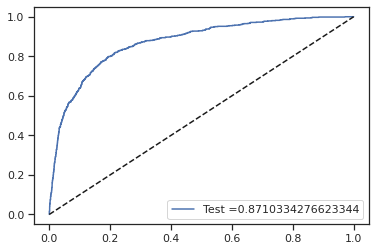

Algorithm_Name         Scenario  ROC_score  \
0  Logistic Regression with Default paramter  Incremental PCA       0.88   
1        Logistic Regression with L2 Penalty  Incremental PCA       0.88   
2       Random Forest with default parameter  Incremental PCA       0.87   
3    Gradient Boosting with Default Paramter  Incremental PCA       0.87   

   threshold  
0       0.14  
1       0.14  
2       0.47  
3       0.10

In [ ]:
result_df = ClassificationMetricAndRocCurve(y_test, y_pred_gbc, y_pred_prob_gbc, result_df, 'Gradient Boosting with Default Paramter', Constants.INCREMENT_PCA)
result_df

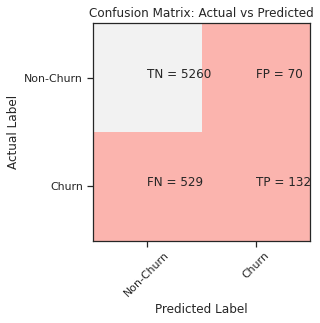

In [ ]:
PlotConfusionMatrix(y_test, y_pred_gbc)

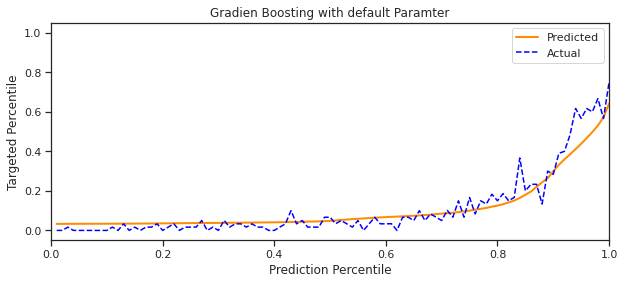

In [ ]:
PlotLiftMatric(y_test, y_pred_prob_gbc, 'Gradien Boosting with default Paramter')

#### Difference between random forest and gradient boosting

| Random Forest | Gradient Boosting |
| --- | --- |
| Bagging  + Decision Trees | Boosting + Gradient Descent |
| Many trees – different samples – aggregated voting for class prediction | Sequential trees – each improving on the prior tree – each tree improves classification |
| Independent trees | Dependent trees |
| Reduces variance, with minimal increase in bias | Minimizes bias |
| Hyperparameters – well established, easy to apply | Hyperparameters – need care in configuration |


### Gradient Boosting with Hyperparameter tuning

Let's now try to tune hyperparameters in gradient boosting classifier. Start with with two hyperparameters - n_estimators and max_depth.

- n_estimators: integer, optional (default=10): The number of trees in the forest
- max_depth : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

#### Change in estimators & max_depth

In [ ]:
params = {'max_depth': range(5,8,1), 'n_estimators': range(200, 500, 100)}
folds = 5
gridSearch_cv_gbc = GridSearchCV(estimator=GradientBoostingClassifier(
                                                                      learning_rate = 0.01,
                                                                      min_samples_leaf = 10,
                                                                      min_samples_split = 20,
                                                                      subsample = 0.2,
                                                                      random_state = 999,
                                                                      verbose =2),
                                 param_grid = params, scoring = 'roc_auc', n_jobs = -1, cv = folds, iid = False,verbose = 2 )

In [ ]:
gridSearch_cv_gbc.fit(ipca_train_df, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 26.7min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6347           0.0054            1.94m
         2           0.6787           0.0052            1.91m
         3           0.6904           0.0052            1.90m
         4           0.6779           0.0049            1.89m
         5           0.6439           0.0042            1.88m
         6           0.6327           0.0043            1.87m
         7           0.6368           0.0041            1.86m
         8           0.6546           0.0043            1.85m
         9           0.6320           0.0040            1.85m
        10           0.6270           0.0040            1.84m
        11           0.6254           0.0036            1.84m
        12           0.6125           0.0041            1.83m
        13           0.6145           0.0038            1.82m
        14           0.6154           0.0036            1.81m
        15           0.5977           0.0034            1.81m
       

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.01,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=10,
                                                  min_samples_split=20,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [ ]:
print(gridSearch_cv_gbc.best_params_)
print(gridSearch_cv_gbc.best_score_)

{'max_depth': 7, 'n_estimators': 400}
0.8896087059187812


#### Now tune hyperparameter min_samples_leaf

In [ ]:
params = {'min_samples_leaf': range(10, 100, 20)}
gridSearch_cv_gbc = GridSearchCV(estimator=GradientBoostingClassifier(
                                                                      n_estimators = 400,
                                                                      learning_rate = 0.01,
                                                                      min_samples_split = 20,
                                                                      max_depth = 7,
                                                                      subsample = 0.2,
                                                                      random_state = 999,
                                                                      verbose =2),
                                 param_grid = params, scoring = 'roc_auc', n_jobs = -1, cv = folds, iid = False,verbose = 2 )

In [ ]:
gridSearch_cv_gbc.fit(ipca_train_df, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 21.0min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6368           0.0053            1.83m
         2           0.6815           0.0049            1.83m
         3           0.6933           0.0049            1.80m
         4           0.6814           0.0048            1.78m
         5           0.6475           0.0046            1.77m
         6           0.6363           0.0042            1.76m
         7           0.6395           0.0041            1.76m
         8           0.6592           0.0041            1.75m
         9           0.6363           0.0039            1.75m
        10           0.6308           0.0040            1.75m
        11           0.6308           0.0035            1.75m
        12           0.6167           0.0040            1.74m
        13           0.6203           0.0036            1.74m
        14           0.6200           0.0036            1.73m
        15           0.6047           0.0032            1.72m
       

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.01,
                                                  loss='deviance', max_depth=7,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=20,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=400,
                                                  n_iter_no_change=None,
       

In [ ]:
print(gridSearch_cv_gbc.best_params_)
print(gridSearch_cv_gbc.best_score_)

{'min_samples_leaf': 30}
0.8903344391496043


In [ ]:
gridSearch_cv_gbc = GradientBoostingClassifier(ccp_alpha=0.0,
                          criterion='friedman_mse',
                          init=None, learning_rate=0.01,
                          loss='deviance', max_depth=7,
                          max_features=None,
                          max_leaf_nodes=None,
                          min_impurity_decrease=0.0,
                          min_impurity_split=None,
                          min_samples_leaf=30,
                          min_samples_split=20,
                          min_weight_fraction_leaf=0.0,
                          n_estimators=400,
                          n_iter_no_change=None,
                          presort='deprecated',
                          random_state=999,
                          subsample=0.2, tol=0.0001,
                          validation_fraction=0.1,
                          verbose=2, warm_start=False)

In [ ]:
gridSearch_cv_gbc.fit(ipca_train_df, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6368           0.0053            1.86m
         2           0.6815           0.0049            1.81m
         3           0.6933           0.0049            1.79m
         4           0.6814           0.0048            1.78m
         5           0.6475           0.0046            1.76m
         6           0.6363           0.0042            1.76m
         7           0.6395           0.0041            1.75m
         8           0.6592           0.0041            1.76m
         9           0.6363           0.0039            1.76m
        10           0.6308           0.0040            1.77m
        11           0.6308           0.0035            1.77m
        12           0.6167           0.0040            1.75m
        13           0.6203           0.0036            1.75m
        14           0.6200           0.0036            1.74m
        15           0.6047           0.0032            1.74m
       

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=30, min_samples_split=20,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=999, subsample=0.2, tol=0.0001,
                           validation_fraction=0.1, verbose=2,
                           warm_start=False)

In [ ]:
y_pred_prob_gbc = gridSearch_cv_gbc.predict(ipca_test_df)
y_pred_prob_gbc = gridSearch_cv_gbc.predict_proba(ipca_test_df)[:,1]

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5330
           1       0.65      0.20      0.31       661

    accuracy                           0.90      5991
   macro avg       0.78      0.59      0.63      5991
weighted avg       0.88      0.90      0.88      5991

Accuracy of the test data 0.90
threshold: 0.14
ROC score for the test data 88.24%


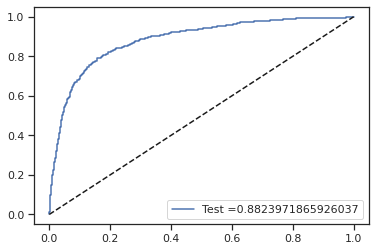

Algorithm_Name         Scenario  ROC_score  \
0     Logistic Regression with Default paramter  Incremental PCA       0.88   
1           Logistic Regression with L2 Penalty  Incremental PCA       0.88   
2          Random Forest with default parameter  Incremental PCA       0.87   
3       Gradient Boosting with Default Paramter  Incremental PCA       0.87   
4  Gradient Boosting with Hyperparameter Tuning  Incremental PCA       0.88   

   threshold  
0       0.14  
1       0.14  
2       0.47  
3       0.10  
4       0.14

In [ ]:
result_df = ClassificationMetricAndRocCurve(y_test, y_pred_gbc, y_pred_prob, result_df, "Gradient Boosting with Hyperparameter Tuning",Constants.INCREMENT_PCA)
result_df

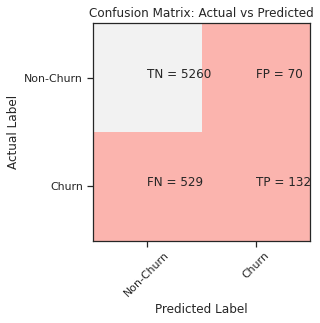

In [ ]:
PlotConfusionMatrix(y_test, y_pred_gbc)

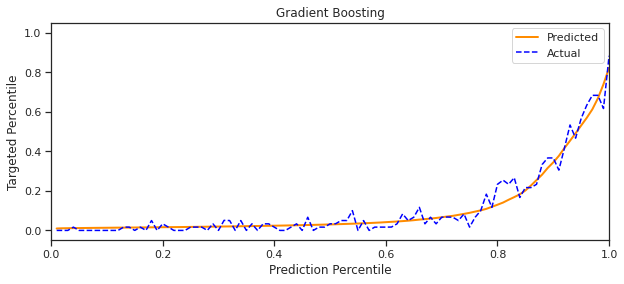

In [ ]:
PlotLiftMatric(y_test, y_pred_prob_gbc, "Gradient Boosting")

## SVM (Support Vector Machine)

In [ ]:
svm_rbf = svm.SVC(kernel='rbf', probability=True)

svm_rbf.fit(ipca_train_df, y_train)

y_pred_svm = svm_rbf.predict(ipca_test_df)
y_pred_prob_svm = svm_rbf.predict_proba(ipca_test_df)[:, 1]


              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5330
           1       0.72      0.27      0.39       661

    accuracy                           0.91      5991
   macro avg       0.82      0.63      0.67      5991
weighted avg       0.89      0.91      0.89      5991

Accuracy of the test data 0.91
threshold: 0.1
ROC score for the test data 87.88%


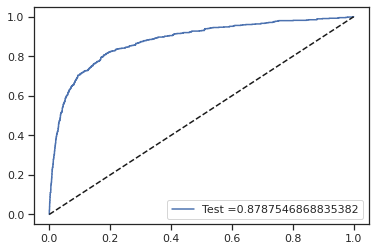

Algorithm_Name         Scenario  ROC_score  \
0     Logistic Regression with Default paramter  Incremental PCA       0.88   
1           Logistic Regression with L2 Penalty  Incremental PCA       0.88   
2          Random Forest with default parameter  Incremental PCA       0.87   
3       Gradient Boosting with Default Paramter  Incremental PCA       0.87   
4  Gradient Boosting with Hyperparameter Tuning  Incremental PCA       0.88   
5                                           SVM  Incremental PCA       0.88   

   threshold  
0       0.14  
1       0.14  
2       0.47  
3       0.10  
4       0.14  
5       0.10

In [ ]:
result_df = ClassificationMetricAndRocCurve(y_test, y_pred_svm, y_pred_prob_svm, result_df, 'SVM', Constants.INCREMENT_PCA)
result_df

# Now creating Models on Actual Features 

#### XGBoost

In [ ]:
cv_folds = StratifiedKFold(n_splits= 10, random_state=999, shuffle=True)

xgb_model = xgb.XGBClassifier(
                              n_estimators = 250,
                              learning_rate = 0.05,
                              max_depth = 8,
                              n_jobs = 4,
                              colsample_bytree = 0.55,
                              gamma = 0.23,
                              cv =cv_folds,
                              scoring = 'f1_weighted')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.55,
              cv=StratifiedKFold(n_splits=10, random_state=999, shuffle=True),
              gamma=0.23, learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              scoring='f1_weighted', seed=None, silent=None, subsample=1,
              verbosity=1)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5330
           1       0.74      0.54      0.62       661

    accuracy                           0.93      5991
   macro avg       0.84      0.76      0.79      5991
weighted avg       0.92      0.93      0.92      5991

Accuracy of the test data 0.93
threshold: 0.051
ROC score for the test data 92.98%


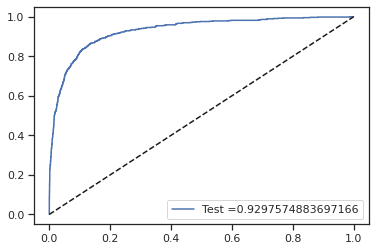

Algorithm_Name         Scenario  ROC_score  \
0     Logistic Regression with Default paramter  Incremental PCA       0.88   
1           Logistic Regression with L2 Penalty  Incremental PCA       0.88   
2          Random Forest with default parameter  Incremental PCA       0.87   
3       Gradient Boosting with Default Paramter  Incremental PCA       0.87   
4  Gradient Boosting with Hyperparameter Tuning  Incremental PCA       0.88   
5                                           SVM  Incremental PCA       0.88   
6                                      XB Boost  Actual Features       0.93   

   threshold  
0       0.14  
1       0.14  
2       0.47  
3       0.10  
4       0.14  
5       0.10  
6       0.05

In [ ]:
result_df = ClassificationMetricAndRocCurve(y_test, y_pred_xgb, y_pred_prob_xgb, result_df, "XB Boost", Constants.ACTUAL_FEATURES)
result_df

In [ ]:
def CrossValidationScore(model, X_train, y_train, folds):
  scores = cross_val_score(model, X_train, y_train, cv = folds, scoring='roc_auc')
  print('Scores:', scores)
  print("Mean Score", scores.mean())
  print("STD:", scores.std())

In [ ]:
CrossValidationScore(xgb_model, X_train, y_train, cv_folds)

Scores: [0.9232335  0.92856989 0.93766385 0.93195094 0.94431988 0.93549215
 0.94224394 0.94411572 0.95269915 0.93198286]
Mean Score 0.9372271863859784
STD: 0.008316383853398049


As we see that mean is high which means model is stable it is not by chance and standard deviation is also very low which means there is not much variance in the result.

#### As we can from above data that XB Boost outperform other algorithms till now. We will use other algorithms as well

#### AdaBoost

In [ ]:
#base estimator: a weak learner with max_depth = 2 
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state=999)
shallow_tree.fit(X_train, y_train)
y_pred_tree = shallow_tree.predict(X_test)
score = accuracy_score(y_test, y_pred_tree)
print('Shallow Tree Score','{:.2f}'.format(score))

Shallow Tree Score 0.92


In [ ]:
# adaboost with the tree as base estimator

estimators = list(range(50,200,10))

abc_score = []
for n_est in estimators:
    abc = AdaBoostClassifier(
          base_estimator=shallow_tree,
          n_estimators=n_est)
   
    abc.fit(X_train, y_train)
    y_pred = abc.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    abc_score.append(score)

In [ ]:
abc_score

[0.9167083959272242,
 0.9148723084626941,
 0.914538474378234,
 0.9148723084626941,
 0.9138708062093139,
 0.9148723084626941,
 0.9123685528292439,
 0.9110332164914038,
 0.9108662994491737,
 0.9115339676180938,
 0.9120347187447838,
 0.9123685528292439,
 0.9127023869137039,
 0.913703889167084,
 0.9118678017025539]

In [ ]:
abc = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators=110)
abc.fit(X_train, y_train)

y_pred_abc = abc.predict(X_test)
y_pred_prob_abc = abc.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5330
           1       0.62      0.53      0.57       661

    accuracy                           0.91      5991
   macro avg       0.78      0.74      0.76      5991
weighted avg       0.91      0.91      0.91      5991

Accuracy of the test data 0.91
threshold: 0.49
ROC score for the test data 88.90%


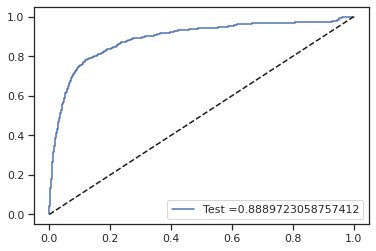

Algorithm_Name         Scenario  ROC_score  \
0     Logistic Regression with Default paramter  Incremental PCA       0.88   
1           Logistic Regression with L2 Penalty  Incremental PCA       0.88   
2          Random Forest with default parameter  Incremental PCA       0.87   
3       Gradient Boosting with Default Paramter  Incremental PCA       0.87   
4  Gradient Boosting with Hyperparameter Tuning  Incremental PCA       0.88   
5                                           SVM  Incremental PCA       0.88   
6                                      XB Boost  Actual Features       0.93   
7                                     Ada Boost  Actual Features       0.89   

   threshold  
0       0.14  
1       0.14  
2       0.47  
3       0.10  
4       0.14  
5       0.10  
6       0.05  
7       0.49

In [ ]:
result_df = ClassificationMetricAndRocCurve(y_test, y_pred_abc, y_pred_prob_abc, result_df, "Ada Boost", Constants.ACTUAL_FEATURES)
result_df

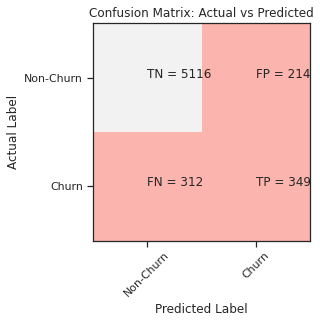

In [ ]:
PlotConfusionMatrix(y_test, y_pred_abc)

#### Random Forest for Actual Features

In [295]:
rf_actual = RandomForestClassifier(n_estimators=200, 
                                     criterion='entropy', 
                                     max_depth=15, 
                                     min_samples_split=500,
                                     min_samples_leaf = 1,
                                     min_weight_fraction_leaf = 0.0,
                                     max_features ='auto',
                                     max_leaf_nodes = None,
                                     min_impurity_decrease = 0.0,
                                     min_impurity_split = 1e-07,
                                     bootstrap = True,
                                     oob_score = False,
                                     n_jobs = None,
                                     random_state= 999,
                                     verbose = 0,
                                     warm_start = False,
                                     class_weight = 'balanced_subsample',
                                     max_samples = 0.6                                     
                                     )

In [296]:
rf_actual.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=0.6, min_impurity_decrease=0.0,
                       min_impurity_split=1e-07, min_samples_leaf=1,
                       min_samples_split=500, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=999, verbose=0, warm_start=False)

In [297]:
y_pred_rf_actual = rf_actual.predict(X_test)
y_pred_prob_rf_actual = rf_actual.predict_proba(X_test)[:, 1]


              precision    recall  f1-score   support

           0       0.97      0.88      0.92      5330
           1       0.44      0.80      0.57       661

    accuracy                           0.87      5991
   macro avg       0.71      0.84      0.75      5991
weighted avg       0.91      0.87      0.88      5991

Accuracy of the test data 0.87
threshold: 0.41
ROC score for the test data 91.92%


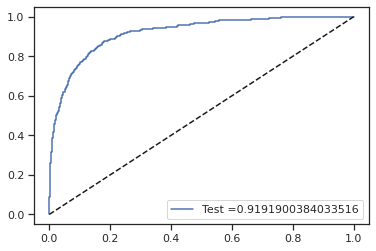

Algorithm_Name         Scenario  ROC_score  threshold
0  Random Forest  Actual Features       0.92       0.41

In [298]:
ClassificationMetricAndRocCurve(y_test,y_pred_rf_actual, y_pred_prob_rf_actual, result_df, "Random Forest", Constants.ACTUAL_FEATURES)

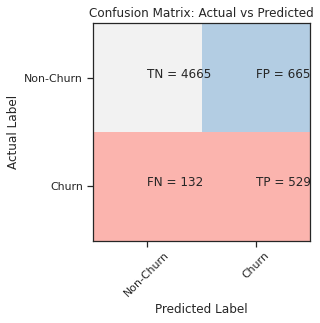

In [299]:
PlotConfusionMatrix(y_test, y_pred_rf_actual)

In [300]:
important = rf_actual.feature_importances_
cols = X.columns

selected_imp_cols = pd.DataFrame(sorted(zip(important, list(cols)), reverse=True), columns =['value', 'ColumnName'])
selected_imp_cols

value                          ColumnName
0     0.07                    loc_ic_t2m_mou_8
1     0.07                        loc_ic_mou_8
2     0.07                    loc_og_t2m_mou_8
3     0.06                        loc_og_mou_8
4     0.05                    loc_ic_t2t_mou_8
5     0.04                    loc_og_t2t_mou_8
6     0.04          total_data_call_rech_amt_8
7     0.04                  last_day_rch_amt_8
8     0.04                              arpu_8
9     0.03                        std_ic_mou_8
10    0.03                        offnet_mou_8
11    0.02             date_of_last_rech_day_8
12    0.02        date_of_last_rech_day_8diff7
13    0.02                    loc_ic_t2f_mou_8
14    0.02                         arpu_8diff7
15    0.02                         onnet_mou_8
16    0.02               total_rech_amt_8diff7
17    0.01                    loc_og_t2f_mou_8
18    0.01                  roam_og_mou_8diff7
19    0.01                       roam_og_mou_8
20    0.01                    std_ic_t2m_mou_8
21    0.01                        std_og_mou_8
22    0.01                      max_rech_amt_8
23    0.01                   loc_ic_mou_8diff7
24    0.01                   loc_og_mou_8diff7
25    0.01                   std_og_mou_8diff7
26    0.01               loc_ic_t2m_mou_8diff7
27    0.01                       roam_ic_mou_8
28    0.01                  roam_ic_mou_8diff7
29    0.01     total_data_call_rech_amt_8diff7
30    0.01               loc_og_t2m_mou_8diff7
31    0.01               loc_og_t2t_mou_8diff7
32    0.01                   offnet_mou_8diff7
33    0.01                 total_ic_mou_8diff7
34    0.01                    total_rech_num_8
35    0.01                         vol_3g_mb_8
36    0.01                         vol_2g_mb_8
37    0.01               loc_ic_t2t_mou_8diff7
38    0.01                  avg_loc_og_mou_6_7
39    0.01                     max_rech_data_8
40    0.00                  avg_loc_ic_mou_6_7
41    0.00              avg_loc_og_t2m_mou_6_7
42    0.00                          aug_vbc_3g
43    0.00               std_ic_t2m_mou_8diff7
44    0.00                    onnet_mou_8diff7
45    0.00        date_of_last_rech_data_day_8
46    0.00               total_rech_num_8diff7
47    0.00             last_day_rch_amt_8diff7
48    0.00                        spl_og_mou_8
49    0.00              avg_loc_og_t2t_mou_6_7
50    0.00                    vol_3g_mb_8diff7
51    0.00                                 aon
52    0.00                   std_ic_mou_8diff7
53    0.00               loc_og_t2f_mou_8diff7
54    0.00              avg_loc_ic_t2m_mou_6_7
55    0.00                           fb_user_8
56    0.00                       vbc_3g_8diff7
57    0.00                avg_total_og_mou_6_7
58    0.00                           arpu_3g_8
59    0.00                    std_ic_t2t_mou_8
60    0.00                 max_rech_amt_8diff7
61    0.00               std_ic_t2t_mou_8diff7
62    0.00              avg_loc_ic_t2f_mou_6_7
63    0.00                  avg_offnet_mou_6_7
64    0.00                  avg_std_og_mou_6_7
65    0.00                   avg_onnet_mou_6_7
66    0.00                         arpu_7diff6
67    0.00              avg_loc_ic_t2t_mou_6_7
68    0.00              avg_total_rech_num_6_7
69    0.00                    vol_2g_mb_8diff7
70    0.00              avg_std_og_t2m_mou_6_7
71    0.00              avg_loc_og_t2f_mou_6_7
72    0.00                      arpu_2g_8diff7
73    0.00                  roam_og_mou_7diff6
74    0.00                        avg_arpu_6_7
75    0.00                   std_og_mou_7diff6
76    0.00                   loc_og_mou_7diff6
77    0.00                avg_max_rech_amt_6_7
78    0.00               loc_ic_t2f_mou_8diff7
79    0.00               total_rech_amt_7diff6
80    0.00               loc_og_t2m_mou_7diff6
81    0.00                   loc_ic_mou_7diff6
82    0.00              avg_std_ic_t2m_mou_6_7
83    0.00                  avg_std_ic_mou_6_7
84    0.00

In [301]:
def PlotRandomForestImportantFeature(important_features):
  plt.clf()
  from pylab import rcParams
  rcParams['figure.figsize'] = 20, 3
  important_features[0:50].plot(x='ColumnName', y= 'value', kind = 'bar', title = "Random Forest important features")
  plt.ylabel("Feature Important Score")
  plt.xlabel("Feature Name")
  plt.show()

<Figure size 432x288 with 0 Axes>

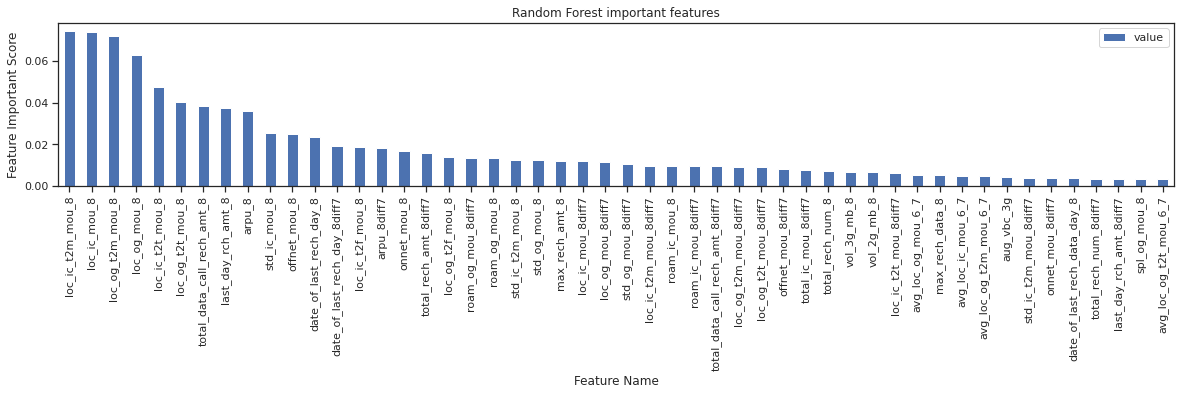

In [302]:
PlotRandomForestImportantFeature(selected_imp_cols)

#### SVM with actual Features

In [ ]:
svm_actual = svm.SVC(kernel='rbf', probability =True)
svm_actual.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_svm_actual = svm_actual.predict(X_test)
y_pred_prob_svm_actual = svm_actual.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5330
           1       0.76      0.26      0.38       661

    accuracy                           0.91      5991
   macro avg       0.84      0.62      0.67      5991
weighted avg       0.90      0.91      0.89      5991

Accuracy of the test data 0.91
threshold: 0.13
ROC score for the test data 87.80%


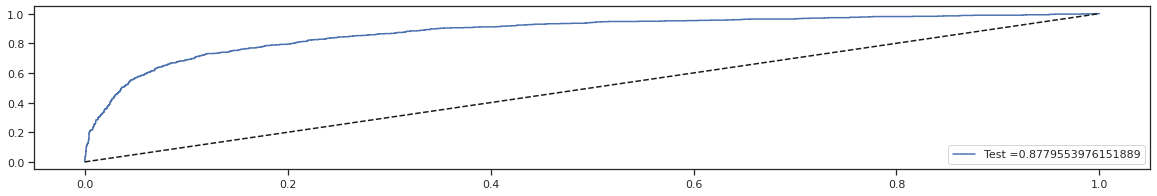

Algorithm_Name         Scenario  ROC_score  \
0     Logistic Regression with Default paramter  Incremental PCA       0.88   
1           Logistic Regression with L2 Penalty  Incremental PCA       0.88   
2          Random Forest with default parameter  Incremental PCA       0.87   
3       Gradient Boosting with Default Paramter  Incremental PCA       0.87   
4  Gradient Boosting with Hyperparameter Tuning  Incremental PCA       0.88   
5                                           SVM  Incremental PCA       0.88   
6                                      XB Boost  Actual Features       0.93   
7                                     Ada Boost  Actual Features       0.89   
8                                           SVM  Actual Features       0.88   

   threshold  
0       0.14  
1       0.14  
2       0.47  
3       0.10  
4       0.14  
5       0.10  
6       0.05  
7       0.49  
8       0.13

In [ ]:
result_df = ClassificationMetricAndRocCurve(y_test, y_pred_svm_actual, y_pred_prob_svm_actual, result_df, "SVM", Constants.ACTUAL_FEATURES)
result_df

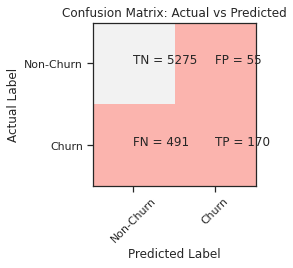

In [ ]:
PlotConfusionMatrix(y_test, y_pred_svm_actual)

In [ ]:
result_df.to_csv('Result.csv')

### Imbalanced Data sets
- Machine Learning algorithms tend to produce unsatisfactory classifiers when faced with imbalanced datasets.
    For any imbalanced data set, if the event to be predicted belongs to the minority class and the event rate is less than 5%,
    it is usually referred to as a rare event.
- Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class
### Approaches to handle Imbalanced data sets
- Resampling Technique
- Algorithmic Ensemble techinique

### Resampling techniques for Balancing the data set

### Resampling Techniques:
- Random under sampling
    - Balance class distribution by randomly eliminating majority class examples.  This is done until the majority and minority class instances are balanced out.
    
- Random Over sampling
    - Increase the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.
    
- Cluster based over sampling
    - the K-means clustering algorithm is independently applied to minority and majority class instances. This is to identify clusters in the dataset. Subsequently, each cluster is oversampled such that all clusters of the same class have an equal number of instances and all classes have the same size.
    
- Synthetic Minority Over sampling Technique (SMOTE)
    - This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.
    
- Modified Synthetic Minority Oversampling Technique (MSMOTE)
    - While the basic flow of MSOMTE is the same as that of SMOTE (discussed in the previous section).  In MSMOTE the strategy of selecting nearest neighbors is different from SMOTE. The algorithm randomly selects a data point from the k nearest neighbors for the security sample, selects the nearest neighbor from the border samples and does nothing for latent noise.

### Algorithmic Ensemble Technique:
- Bagging Based
    - Bagging is an abbreviation of Bootstrap Aggregating. The conventional bagging algorithm involves generating ‘n’ different bootstrap training samples with replacement. And training the algorithm on each bootstrapped algorithm separately and then aggregating the predictions at the end
    - Bagging is used for reducing Overfitting in order to create strong learners for generating accurate predictions. Unlike boosting, bagging allows replacement in the bootstrapped sample.
    
- Boosting Based
     - Boosting is an ensemble technique to combine weak learners to create a strong learner that can make accurate predictions. 
      - Boosting starts out with a base classifier / weak classifier that is prepared on the training data.
- Different Boosting Methods:
      - Ada Boost
      - Gradient Tree Boosting
      - XG Boost

## Random Over Sampling

In [293]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling X_train shape", X_train.shape)
print("Before OverSampling y_train shape", y_train.shape)
print("Before OverSampling X_test shape", X_test.shape)
print("Before OverSampling y_test shape", y_test.shape)

print("Before OverSampling count of 0: ",format(np.sum(y_train == 0)))
print("Before OverSampling count of 1: ",format(np.sum(y_train == 1)))

Before OverSampling X_train shape (23962, 181)
Before OverSampling y_train shape (23962,)
Before OverSampling X_test shape (5991, 181)
Before OverSampling y_test shape (5991,)
Before OverSampling count of 0:  21368
Before OverSampling count of 1:  2594


In [294]:
smote = SMOTE(random_state= 999)

X_train_os, y_train_os = smote.fit_sample(X_train, y_train)

print("After OverSampling X_train shape", X_train_os.shape)
print("After OverSampling y_train shape", y_train_os.shape)

print("After OverSampling count of 0: ",format(np.sum(y_train_os == 0)))
print("After OverSampling count of 1: ",format(np.sum(y_train_os == 1)))

After OverSampling X_train shape (42736, 181)
After OverSampling y_train shape (42736,)
After OverSampling count of 0:  21368
After OverSampling count of 1:  21368


#### Logistic Regression CV with Over sampling

In [ ]:
lr_cv = LogisticRegressionCV(Cs = list(np.power(10.0, np.arange(-10, 10))),
                             penalty= 'l2',
                             fit_intercept = True,
                             cv = Constants.CV_FOLDS,
                             solver= 'newton-cg',
                             max_iter = 100,
                             class_weight = 'balanced',
                             n_jobs = 4,
                             verbose = 2,
                             random_state = Constants.RANDOM_STATE)

In [ ]:
lr_cv.fit(X_train_os, y_train_os)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 79.6min finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     class_weight='balanced', cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=4, penalty='l2',
                     random_state=100, refit=True, scoring=None,
                     solver='newton-cg', tol=0.0001, verbose=2)

In [ ]:
y_pred_lr_cv = lr_cv.predict(X_test)
y_pred_prob_lr_cv = lr_cv.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      5330
           1       0.37      0.81      0.50       661

    accuracy                           0.83      5991
   macro avg       0.67      0.82      0.70      5991
weighted avg       0.91      0.83      0.85      5991

Accuracy of the test data 0.83
threshold: 0.49
ROC score for the test data 88.65%


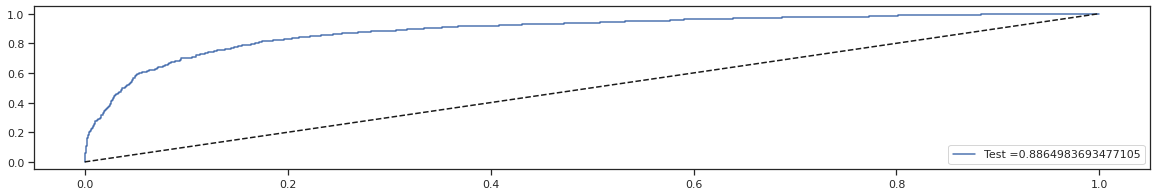

Algorithm_Name         Scenario  ROC_score  \
0     Logistic Regression with Default paramter  Incremental PCA       0.88   
1           Logistic Regression with L2 Penalty  Incremental PCA       0.88   
2          Random Forest with default parameter  Incremental PCA       0.87   
3       Gradient Boosting with Default Paramter  Incremental PCA       0.87   
4  Gradient Boosting with Hyperparameter Tuning  Incremental PCA       0.88   
5                                           SVM  Incremental PCA       0.88   
6                                      XB Boost  Actual Features       0.93   
7                                     Ada Boost  Actual Features       0.89   
8                                           SVM  Actual Features       0.88   
9                        Logistic Regression CV    Over Sampling       0.89   

   threshold  
0       0.14  
1       0.14  
2       0.47  
3       0.10  
4       0.14  
5       0.10  
6       0.05  
7       0.49  
8       0.13  
9       0.49

In [ ]:
result_df = ClassificationMetricAndRocCurve(y_test, y_pred_lr_cv, y_pred_prob_lr_cv, result_df, "Logistic Regression CV", Constants.OVER_SAMPLING)
result_df

#### Random Forest

In [304]:
rf_actual.fit(X_train_os, y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=0.6, min_impurity_decrease=0.0,
                       min_impurity_split=1e-07, min_samples_leaf=1,
                       min_samples_split=500, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=999, verbose=0, warm_start=False)

In [305]:
y_pred_rf_os = rf_actual.predict(X_test)
y_pred_prob_rf_os = rf_actual.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      5330
           1       0.44      0.80      0.57       661

    accuracy                           0.87      5991
   macro avg       0.71      0.84      0.75      5991
weighted avg       0.91      0.87      0.88      5991

Accuracy of the test data 0.87
threshold: 0.45
ROC score for the test data 91.72%


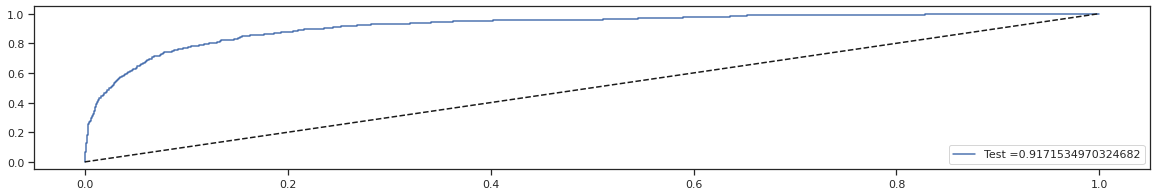

Unnamed: 0                                Algorithm_Name         Scenario  \
0        0.00     Logistic Regression with Default paramter  Incremental PCA   
1        1.00           Logistic Regression with L2 Penalty  Incremental PCA   
2        2.00          Random Forest with default parameter  Incremental PCA   
3        3.00       Gradient Boosting with Default Paramter  Incremental PCA   
4        4.00  Gradient Boosting with Hyperparameter Tuning  Incremental PCA   
5        5.00                                           SVM  Incremental PCA   
6        6.00                                      XB Boost  Actual Features   
7        7.00                                     Ada Boost  Actual Features   
8        8.00                                           SVM  Actual Features   
9         nan                                 Random Forest    Over Sampling   

   ROC_score  threshold  
0       0.88       0.14  
1       0.88       0.14  
2       0.87       0.47  
3       0.87       0.10  
4       0.88       0.14  
5       0.88       0.10  
6       0.93       0.05  
7       0.89       0.49  
8       0.88       0.13  
9       0.92       0.45

In [306]:
result_df = ClassificationMetricAndRocCurve(y_test, y_pred_rf_os, y_pred_prob_rf_os, result_df, "Random Forest", Constants.OVER_SAMPLING)
result_df

In [311]:
important = rf_actual.feature_importances_
cols = X.columns

selected_imp_cols = pd.DataFrame(sorted(zip(important, list(cols)), reverse=True), columns =['value', 'ColumnName'])
selected_imp_cols

value                          ColumnName
0     0.07                    loc_ic_t2m_mou_8
1     0.07                        loc_ic_mou_8
2     0.06                        loc_og_mou_8
3     0.05                    loc_og_t2m_mou_8
4     0.05             date_of_last_rech_day_8
5     0.05          total_data_call_rech_amt_8
6     0.04                              arpu_8
7     0.04                    loc_ic_t2t_mou_8
8     0.03                       roam_og_mou_8
9     0.03                  last_day_rch_amt_8
10    0.03                    loc_og_t2t_mou_8
11    0.03                       roam_ic_mou_8
12    0.02                      max_rech_amt_8
13    0.02                        offnet_mou_8
14    0.02                    total_rech_num_8
15    0.02                  roam_og_mou_8diff7
16    0.02                   loc_og_mou_8diff7
17    0.01                  roam_ic_mou_8diff7
18    0.01        date_of_last_rech_day_8diff7
19    0.01                           fb_user_8
20    0.01               total_rech_amt_8diff7
21    0.01                   loc_ic_mou_8diff7
22    0.01                         onnet_mou_8
23    0.01                        std_ic_mou_8
24    0.01                    loc_ic_t2f_mou_8
25    0.01               loc_ic_t2m_mou_8diff7
26    0.01                    loc_og_t2f_mou_8
27    0.01                         arpu_8diff7
28    0.01                 total_ic_mou_8diff7
29    0.01               loc_og_t2m_mou_8diff7
30    0.01     total_data_call_rech_amt_8diff7
31    0.01               loc_og_t2t_mou_8diff7
32    0.01               loc_ic_t2t_mou_8diff7
33    0.01                 max_rech_amt_8diff7
34    0.01                          aug_vbc_3g
35    0.01               total_rech_num_8diff7
36    0.01                   std_og_mou_8diff7
37    0.01                     max_rech_data_8
38    0.01             last_day_rch_amt_8diff7
39    0.01                         vol_3g_mb_8
40    0.01                   offnet_mou_8diff7
41    0.01        date_of_last_rech_data_day_8
42    0.00              avg_loc_og_t2m_mou_6_7
43    0.00                     count_rech_2g_8
44    0.00                        std_og_mou_8
45    0.00                    onnet_mou_8diff7
46    0.00                    std_ic_t2m_mou_8
47    0.00                avg_total_og_mou_6_7
48    0.00                          vbc_3g_6_7
49    0.00                         vol_2g_mb_8
50    0.00                  avg_loc_ic_mou_6_7
51    0.00                   std_ic_mou_8diff7
52    0.00              avg_total_rech_num_6_7
53    0.00                  avg_loc_og_mou_6_7
54    0.00              avg_loc_ic_t2m_mou_6_7
55    0.00               std_ic_t2m_mou_8diff7
56    0.00                 avg_roam_og_mou_6_7
57    0.00                       vbc_3g_8diff7
58    0.00                                 aon
59    0.00               loc_og_t2f_mou_8diff7
60    0.00                    vol_3g_mb_8diff7
61    0.00                  avg_offnet_mou_6_7
62    0.00                  avg_std_og_mou_6_7
63    0.00                   avg_onnet_mou_6_7
64    0.00                        spl_og_mou_8
65    0.00       avg_date_of_last_rech_day_6_7
66    0.00                 avg_roam_ic_mou_6_7
67    0.00              avg_loc_ic_t2f_mou_6_7
68    0.00              avg_std_ic_t2t_mou_6_7
69    0.00                    vol_2g_mb_8diff7
70    0.00               loc_ic_t2f_mou_8diff7
71    0.00                   spl_ic_mou_8diff7
72    0.00                    std_ic_t2t_mou_8
73    0.00                        avg_arpu_6_7
74    0.00                  avg_spl_og_mou_6_7
75    0.00                        spl_ic_mou_8
76    0.00              avg_loc_og_t2t_mou_6_7
77    0.00              avg_std_og_t2m_mou_6_7
78    0.00                           arpu_3g_8
79    0.00            avg_last_day_rch_amt_6_7
80    0.00              avg_loc_ic_t2t_mou_6_7
81    0.00                avg_max_rech_amt_6_7
82    0.00                     count_rech_3g_8
83    0.00              avg_loc_og_t2c_mou_6_7
84    0.00

<Figure size 1440x216 with 0 Axes>

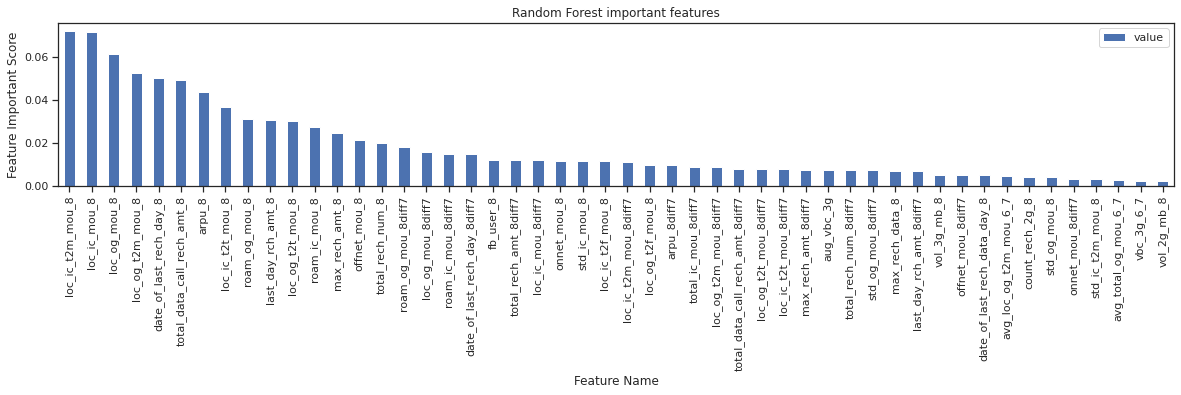

In [313]:
PlotRandomForestImportantFeature(selected_imp_cols)

#### XG Boosting

In [307]:
xgb_model_os = xgb.XGBClassifier(n_estimators=250, 
                                 learning_rate=0.05, 
                                 gamma=0.20, 
                                 max_depth=8, 
                                 colsample_bytree=0.55,
                                 n_jobs = 4,
                                 scoring = 'f1_weighted',
                                 cv= Constants.CV_FOLDS)

In [308]:
xgb_model_os.fit(X_train_os, y_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.55, cv=5, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              scoring='f1_weighted', seed=None, silent=None, subsample=1,
              verbosity=1)

In [309]:
y_pred_xgb_os = xgb_model_os.predict(X_test)
y_pred_prob_xgb_os = xgb_model_os.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5330
           1       0.64      0.61      0.62       661

    accuracy                           0.92      5991
   macro avg       0.80      0.78      0.79      5991
weighted avg       0.92      0.92      0.92      5991

Accuracy of the test data 0.92
threshold: 0.084
ROC score for the test data 92.77%


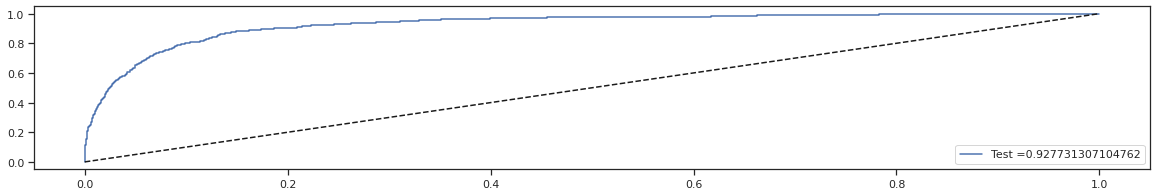

Algorithm_Name         Scenario  ROC_score  \
0      Logistic Regression with Default paramter  Incremental PCA       0.88   
1            Logistic Regression with L2 Penalty  Incremental PCA       0.88   
2           Random Forest with default parameter  Incremental PCA       0.87   
3        Gradient Boosting with Default Paramter  Incremental PCA       0.87   
4   Gradient Boosting with Hyperparameter Tuning  Incremental PCA       0.88   
5                                            SVM  Incremental PCA       0.88   
6                                       XB Boost  Actual Features       0.93   
7                                      Ada Boost  Actual Features       0.89   
8                                            SVM  Actual Features       0.88   
9                                  Random Forest    Over Sampling       0.92   
10                                      XG Boost    Over Sampling       0.93   

    threshold  
0        0.14  
1        0.14  
2        0.47  
3        0.10  
4        0.14  
5        0.10  
6        0.05  
7        0.49  
8        0.13  
9        0.45  
10       0.08

In [316]:
result_df = ClassificationMetricAndRocCurve(y_test, y_pred_xgb_os, y_pred_prob_xgb_os, result_df, 'XG Boost', Constants.OVER_SAMPLING)
result_df

In [357]:
important = xgb_model_os.feature_importances_
cols = X.columns

selected_imp_cols_xgb = pd.DataFrame(sorted(zip(important, list(cols)), reverse=True), columns =['value', 'ColumnName'])
selected_imp_cols_xgb

value                          ColumnName
0     0.10                        loc_ic_mou_8
1     0.07                    loc_og_t2m_mou_8
2     0.06                        loc_og_mou_8
3     0.05                    loc_ic_t2m_mou_8
4     0.04                           fb_user_8
5     0.04                       roam_og_mou_8
6     0.03             date_of_last_rech_day_8
7     0.02          total_data_call_rech_amt_8
8     0.02                              arpu_8
9     0.02                  last_day_rch_amt_8
10    0.02                       roam_ic_mou_8
11    0.02                    total_rech_num_8
12    0.02                      max_rech_amt_8
13    0.01                          aug_vbc_3g
14    0.01        date_of_last_rech_day_8diff7
15    0.01                  roam_ic_mou_8diff7
16    0.01                        spl_ic_mou_8
17    0.01                        monthly_2g_8
18    0.01                  roam_og_mou_8diff7
19    0.01                        offnet_mou_8
20    0.01                        std_og_mou_8
21    0.01                     max_rech_data_8
22    0.01                   avg_sachet_3g_6_7
23    0.01              avg_std_ic_t2t_mou_6_7
24    0.01                  avg_monthly_2g_6_7
25    0.01                  avg_spl_ic_mou_6_7
26    0.01                         arpu_8diff7
27    0.01                         vol_3g_mb_8
28    0.01                 total_ic_mou_8diff7
29    0.01               night_pck_user_7diff6
30    0.01                     count_rech_3g_8
31    0.01              avg_loc_og_t2c_mou_6_7
32    0.01                   monthly_2g_8diff7
33    0.00                count_rech_3g_7diff6
34    0.00               total_rech_num_8diff7
35    0.00             last_day_rch_amt_8diff7
36    0.00                 max_rech_amt_8diff7
37    0.00                    loc_ic_t2t_mou_8
38    0.00                   spl_ic_mou_8diff7
39    0.00                          vbc_3g_6_7
40    0.00        date_of_last_rech_data_day_8
41    0.00               avg_count_rech_2g_6_7
42    0.00       avg_date_of_last_rech_day_6_7
43    0.00                     count_rech_2g_8
44    0.00                        std_ic_mou_8
45    0.00                     avg_fb_user_6_7
46    0.00        date_of_last_rech_day_7diff6
47    0.00                  avg_spl_og_mou_6_7
48    0.00              avg_total_rech_num_6_7
49    0.00                         onnet_mou_8
50    0.00                        spl_og_mou_8
51    0.00                   monthly_3g_8diff7
52    0.00                  avg_std_og_mou_6_7
53    0.00                 avg_roam_og_mou_6_7
54    0.00                   loc_ic_mou_8diff7
55    0.00                avg_total_og_mou_6_7
56    0.00                   std_og_mou_8diff7
57    0.00                    sachet_3g_7diff6
58    0.00                    og_others_7diff6
59    0.00                                 aon
60    0.00                  avg_loc_og_mou_6_7
61    0.00               total_rech_num_7diff6
62    0.00                   loc_og_mou_8diff7
63    0.00               loc_ic_t2t_mou_8diff7
64    0.00                        isd_og_mou_8
65    0.00                   offnet_mou_8diff7
66    0.00                       vbc_3g_8diff7
67    0.00                  avg_isd_ic_mou_6_7
68    0.00                    loc_og_t2f_mou_8
69    0.00                   monthly_3g_7diff6
70    0.00                   spl_ic_mou_7diff6
71    0.00                   avg_og_others_6_7
72    0.00               avg_max_rech_data_6_7
73    0.00               avg_count_rech_3g_6_7
74    0.00                   isd_og_mou_8diff7
75    0.00             last_day_rch_amt_7diff6
76    0.00                   isd_ic_mou_8diff7
77    0.00                 avg_roam_ic_mou_6_7
78    0.00                   avg_ic_others_6_7
79    0.00                      arpu_2g_8diff7
80    0.00   date_of_last_rech_data_day_8diff7
81    0.00                count_rech_2g_8diff7
82    0.00              avg_loc_ic_t2f_mou_6_7
83    0.00             av_rech_amt_data_8diff7
84    0.00

<Figure size 1440x216 with 0 Axes>

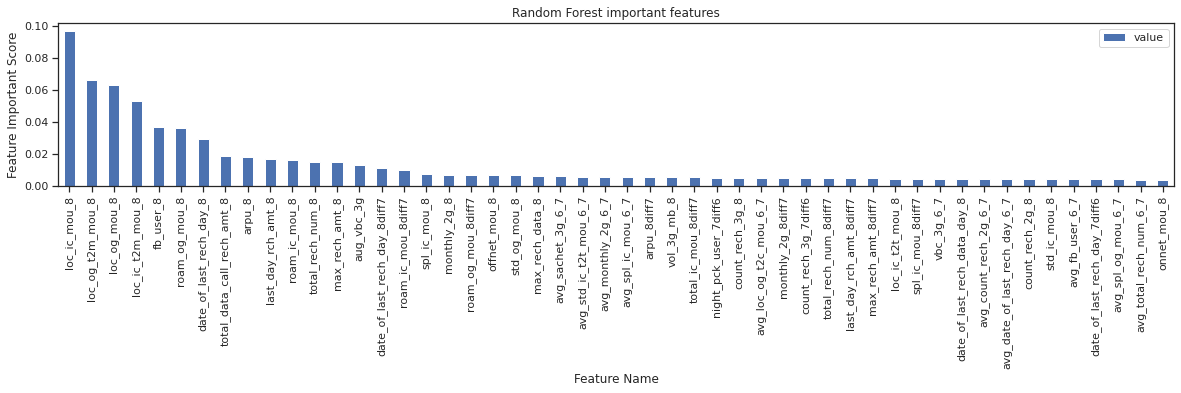

In [318]:
PlotRandomForestImportantFeature(selected_imp_cols)

## Summary about the models

- We trained different machine learning models to solve this classification problems. 
- Both XGBoost and Random Forest Classifier performed the best when compared with other models.
- The **Algorithmic Ensemble Techniques** was able to provide the same performance of the models using the resampling techniques data (the performance is almost the same). So, with balanced class option & stratified K-fold we can still get the same scores without increasing the dataset size
- We considered F1-score and Area under the curve as the primary metrics for the evaluation 

In [343]:
# df_HighValueCustomer[list(selected_imp_cols.head(20).ColumnName.unique)]
imp_features = selected_imp_cols.head(14)
X_imp = df_HighValueCustomer[list(imp_features.ColumnName.unique())]
y_imp = df_HighValueCustomer['Churn']

In [346]:
X_imp_std = scaler.fit_transform(X_imp)

In [347]:
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp_std, y_imp, test_size = 0.2, random_state = Constants.RANDOM_STATE)

In [352]:
rf_imp=RandomForestClassifier(n_estimators=200, criterion= 'entropy', max_depth=15,random_state=111, class_weight='balanced')

In [370]:
rf_imp.fit(X_train_imp, y_train_imp)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=111,
                       verbose=0, warm_start=False)

In [371]:
y_pred_imp_rf = rf_imp.predict(X_test_imp)
y_pred_prob_imp_rf = rf_imp.predict_proba(X_test_imp)[:, 1]

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5363
           1       0.64      0.60      0.62       628

    accuracy                           0.92      5991
   macro avg       0.80      0.78      0.79      5991
weighted avg       0.92      0.92      0.92      5991

Accuracy of the test data 0.92
threshold: 0.18
ROC score for the test data 92.72%


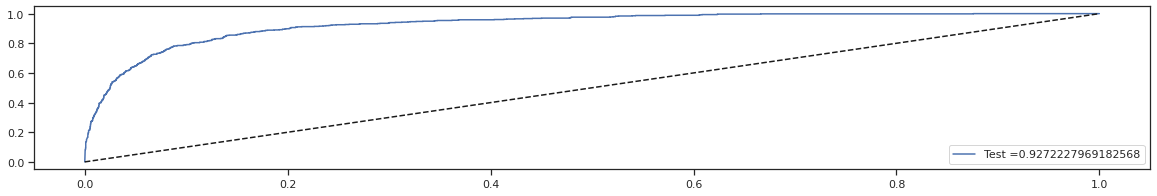

Algorithm_Name            Scenario  \
0      Logistic Regression with Default paramter     Incremental PCA   
1            Logistic Regression with L2 Penalty     Incremental PCA   
2           Random Forest with default parameter     Incremental PCA   
3        Gradient Boosting with Default Paramter     Incremental PCA   
4   Gradient Boosting with Hyperparameter Tuning     Incremental PCA   
5                                            SVM     Incremental PCA   
6                                       XB Boost     Actual Features   
7                                      Ada Boost     Actual Features   
8                                            SVM     Actual Features   
9                                  Random Forest       Over Sampling   
10                                      XG Boost       Over Sampling   
11                                  RandomForest  Important Features   

    ROC_score  threshold  
0        0.88       0.14  
1        0.88       0.14  
2        0.87       0.47  
3        0.87       0.10  
4        0.88       0.14  
5        0.88       0.10  
6        0.93       0.05  
7        0.89       0.49  
8        0.88       0.13  
9        0.92       0.45  
10       0.93       0.08  
11       0.93       0.18

In [372]:
ClassificationMetricAndRocCurve(y_test_imp, y_pred_imp_rf, y_pred_prob_imp_rf, result_df, 'RandomForest', "Important Features")

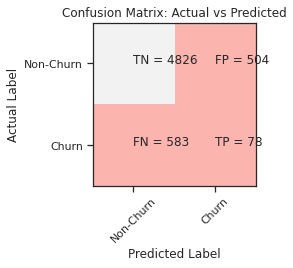

In [373]:
PlotConfusionMatrix(y_test, y_pred_imp_rf)

We train our random forest algorithm on the top 14 features that we selected above and then we evaluated the performance of our algorithm on the training and testing sets. We can see the AUC & F1-score are pretty similar on training & test datasets which means our model is not overfitting.

In [360]:
print("Random Forest Important Features")
imp_features

Random Forest Important Features


value                  ColumnName
0    0.10                loc_ic_mou_8
1    0.07            loc_og_t2m_mou_8
2    0.06                loc_og_mou_8
3    0.05            loc_ic_t2m_mou_8
4    0.04                   fb_user_8
5    0.04               roam_og_mou_8
6    0.03     date_of_last_rech_day_8
7    0.02  total_data_call_rech_amt_8
8    0.02                      arpu_8
9    0.02          last_day_rch_amt_8
10   0.02               roam_ic_mou_8
11   0.02            total_rech_num_8
12   0.02              max_rech_amt_8
13   0.01                  aug_vbc_3g

In [359]:
print("XG Boost Important Features")
selected_imp_cols_xgb.head(14)

XG Boost Important Features


value                  ColumnName
0    0.10                loc_ic_mou_8
1    0.07            loc_og_t2m_mou_8
2    0.06                loc_og_mou_8
3    0.05            loc_ic_t2m_mou_8
4    0.04                   fb_user_8
5    0.04               roam_og_mou_8
6    0.03     date_of_last_rech_day_8
7    0.02  total_data_call_rech_amt_8
8    0.02                      arpu_8
9    0.02          last_day_rch_amt_8
10   0.02               roam_ic_mou_8
11   0.02            total_rech_num_8
12   0.02              max_rech_amt_8
13   0.01                  aug_vbc_3g

We can observe the top features selected by the XG Boost & Random Forest is similar. So, we can conclude that these are the important indicators of churn

## Recommendations to Business 

- From the above we can clearly infer that calls related incoming & outgoing within a circle is key for identifying churn customers
- Especially the usage during the action pahse when compared to good month (7th month) has reduced
- The other key factor is if the recharge amount shows a dip in the action phase is sign of churn
- Age on network is also a key indicator for identifying the churn, if aon is less than 500 days and their usage is reduce then the customer is going to be churned
- The usage of mobile data has also reduced when compared with 7th month. So, data usage & amount can also be the other features for understanding the churn behavior